[[Python] Keras-RLで簡単に強化学習(DQN)を試す](http://qiita.com/inoory/items/e63ade6f21766c7c2393)を参考に、エージェントを作成する。FXの自動取引を行い、利益を出すのが目標。

In [ ]:
import matplotlib as mpl
mpl.use('tkagg')
import numpy as np
import pandas as pd
import talib
from logging import getLogger, StreamHandler, DEBUG, INFO

from hist_data import HistData
from fx_trade import FXTrade
from deep_fx import DeepFX

Using TensorFlow backend.


In [ ]:
logger = getLogger(__name__)
handler = StreamHandler()
#handler.setLevel(INFO)
#logger.setLevel(INFO)
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)

In [ ]:
#import imp
#import sys
#del(hist_data)
#from hist_data import HistData
#del(hist_data)
#imp.reload(hist_data)
#imp.reload(sys.modules[hist_data.__module__])
hd = HistData(csv_path = 'historical_data/DAT_ASCII_USDJPY_M1_201710_m5.csv',
                     begin_date='2017-10-02T00:00:00',
                     end_date='2017-10-02T23:59:59')
                     #end_date='2017-10-09T23:59:59')

header is included


In [ ]:
hd.data()
#len(hist_data.data())

,Open,High,Low,Close,Volume
Date,,,,,
2017-10-02 00:00:00,112.808,112.833,112.805,112.833,0
2017-10-02 00:05:00,112.833,112.834,112.784,112.793,0
2017-10-02 00:10:00,112.793,112.821,112.788,112.812,0
2017-10-02 00:15:00,112.812,112.812,112.790,112.794,0
2017-10-02 00:20:00,112.801,112.805,112.787,112.795,0
2017-10-02 00:25:00,112.795,112.832,112.794,112.826,0
2017-10-02 00:30:00,112.826,112.834,112.820,112.827,0
2017-10-02 00:35:00,112.825,112.851,112.819,112.832,0
2017-10-02 00:40:00,112.836,112.851,112.827,112.841,0


In [ ]:
env = FXTrade(1000000, 0.08, hd, logger=logger)
#env = FXTrade(1000000, 0.08, h, logger=logger)
prepared_model_filename = None #'Keras-RL_DQN_FX_model_meanq1.440944e+06_episode00003.h5'
dfx = DeepFX(env, prepared_model_filename=prepared_model_filename, episodes = 3)

In [ ]:
is_to_train = True
if is_to_train:
    dfx.train(is_for_time_measurement=True)
else:
    dfx.test(1, [EpisodeLogger()])

_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None
17/11/05 19:59:31
Training for 861 steps ...
Training for 861 steps ...
========== Model Saver output ==============
mean_q value: 0.000000e+00
Step 00001: model improved
  from 0.000000e+00
    to 0.000000e+00, saving model to ./models/Keras-RL_DQN_FX_model_meanq0.000000e+00_episode00000
Save model to ./models/Keras-RL_DQN_FX_model_meanq0.000000e+00_episode00000 has done.
max mean_q value: 0.000000e+00


Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111
now_datetime: 2017-10-02 00:00:0

========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
   5/861: episode: 5, duration: 0.036s, episode steps: 1, steps per second: 28, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
   5/861: episode: 5, duration: 0.039s, episode steps: 1, steps per second: 26, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
   6/861: episode: 6, duration: 0.035s, episode steps: 1, steps per second: 29, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss

len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2

========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  11/861: episode: 11, duration: 0.033s, episode steps: 1, steps per second: 30, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
  11/861: episode: 11, duration: 0.034s, episode steps: 1, steps per second: 29, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  12/861: episode: 12, duration: 0.035s, episode steps: 1, steps per second: 29, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], l

_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000000.000000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115207.739151
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_res

========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  17/861: episode: 17, duration: 0.036s, episode steps: 1, steps per second: 28, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
  17/861: episode: 17, duration: 0.037s, episode steps: 1, steps per second: 27, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  19/861: episode: 18, duration: 0.053s, episode steps: 2, steps per second: 38, episode reward: 884792.261, mean reward: 442396.130 [-115207.739, 1000000.000], mean action: 1.500 [1.000, 2.000], mean observation: 57.151 [1.000, 112.812], los

_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115207.739151
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before:

========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  25/861: episode: 23, duration: 0.050s, episode steps: 2, steps per second: 40, episode reward: 884792.261, mean reward: 442396.130 [-115207.739, 1000000.000], mean action: 1.500 [1.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: --, mean_q: --
  25/861: episode: 23, duration: 0.051s, episode steps: 2, steps per second: 39, episode reward: 884792.261, mean reward: 442396.130 [-115207.739, 1000000.000], mean action: 1.500 [1.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: --, mean_q: --
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  26/861: episode: 24, duration: 0.030s, episode steps: 1, steps per second: 34, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss:

reward: -115207.739151
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_ste

========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  32/861: episode: 29, duration: 0.046s, episode steps: 2, steps per second: 43, episode reward: 884792.261, mean reward: 442396.130 [-115207.739, 1000000.000], mean action: 1.500 [1.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: --, mean_q: --
  32/861: episode: 29, duration: 0.048s, episode steps: 2, steps per second: 41, episode reward: 884792.261, mean reward: 442396.130 [-115207.739, 1000000.000], mean action: 1.500 [1.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: --, mean_q: --
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  33/861: episode: 30, duration: 0.045s, episode steps: 1, steps per second: 22, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss:

_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 28

========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  38/861: episode: 35, duration: 0.032s, episode steps: 1, steps per second: 31, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
  38/861: episode: 35, duration: 0.033s, episode steps: 1, steps per second: 30, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  39/861: episode: 36, duration: 0.033s, episode steps: 1, steps per second: 30, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], l

self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111
now_datetime:

========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  45/861: episode: 42, duration: 0.035s, episode steps: 1, steps per second: 29, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
  45/861: episode: 42, duration: 0.035s, episode steps: 1, steps per second: 28, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  46/861: episode: 43, duration: 0.034s, episode steps: 1, steps per second: 29, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], l

  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_

========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  51/861: episode: 48, duration: 0.029s, episode steps: 1, steps per second: 35, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
  51/861: episode: 48, duration: 0.029s, episode steps: 1, steps per second: 34, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  52/861: episode: 49, duration: 0.033s, episode steps: 1, steps per second: 30, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], l

_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -11

========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  57/861: episode: 54, duration: 0.035s, episode steps: 1, steps per second: 29, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
  57/861: episode: 54, duration: 0.035s, episode steps: 1, steps per second: 29, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  58/861: episode: 55, duration: 0.030s, episode steps: 1, steps per second: 34, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], l

_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000000.000000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115207.739151
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step

========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  64/861: episode: 61, duration: 0.037s, episode steps: 1, steps per second: 27, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
  64/861: episode: 61, duration: 0.038s, episode steps: 1, steps per second: 27, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  66/861: episode: 62, duration: 0.048s, episode steps: 2, steps per second: 41, episode reward: 884792.261, mean reward: 442396.130 [-115207.739, 1000000.000], mean action: 1.500 [1.000, 2.000], mean observation: 57.151 [1.000, 112.812], los

now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
se

========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  71/861: episode: 67, duration: 0.031s, episode steps: 1, steps per second: 32, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
  71/861: episode: 67, duration: 0.032s, episode steps: 1, steps per second: 31, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  72/861: episode: 68, duration: 0.038s, episode steps: 1, steps per second: 26, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], l

_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000004.513320
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115207.739151
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000004.513320
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
positions_buy_or_sell: 1
reward: 1000000.000000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-0

========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  80/861: episode: 72, duration: 0.045s, episode steps: 2, steps per second: 45, episode reward: 884796.774, mean reward: 442398.387 [-115207.739, 1000004.513], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: --, mean_q: --
  80/861: episode: 72, duration: 0.045s, episode steps: 2, steps per second: 44, episode reward: 884796.774, mean reward: 442398.387 [-115207.739, 1000004.513], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: --, mean_q: --
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  83/861: episode: 73, duration: 0.068s, episode steps: 3, steps per second: 44, episode reward: 1884611.061, mean reward: 628203.687 [-115393.453, 1000004.513], mean action: 1.333 [0.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 

  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_

========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  87/861: episode: 77, duration: 0.038s, episode steps: 1, steps per second: 26, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
  87/861: episode: 77, duration: 0.038s, episode steps: 1, steps per second: 26, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  88/861: episode: 78, duration: 0.031s, episode steps: 1, steps per second: 32, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], l

   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115598.714111
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000

========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  93/861: episode: 83, duration: 0.037s, episode steps: 1, steps per second: 27, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
  93/861: episode: 83, duration: 0.038s, episode steps: 1, steps per second: 26, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  94/861: episode: 84, duration: 0.034s, episode steps: 1, steps per second: 30, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], l

   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115605.370498
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999606.881973
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115605.370498
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2

========== Model Saver output ==============
mean_q value: 5.702987e+01
Step 00102: model improved
  from 0.000000e+00
    to 5.702987e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq5.702987e+01_episode00086
Save model to ./models/Keras-RL_DQN_FX_model_meanq5.702987e+01_episode00086 has done.
max mean_q value: 5.702987e+01
========== /Model Saver output =============
 102/861: episode: 87, duration: 0.457s, episode steps: 2, steps per second: 4, episode reward: 884001.511, mean reward: 442000.756 [-115605.370, 999606.882], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 122630856704.000000, mean_q: 57.029865
 102/861: episode: 87, duration: 0.458s, episode steps: 2, steps per second: 4, episode reward: 884001.511, mean reward: 442000.756 [-115605.370, 999606.882], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 122630856704.000000, mean_q: 57.029865
========== Model Saver output ==============
mean_q valu

_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999606.881973
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115605.370498
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999606.881973
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115605.370498
now_datetime: 2017-10-02 00:05:00

========== Model Saver output ==============
mean_q value: 5.693508e+01
========== /Model Saver output =============
 110/861: episode: 91, duration: 0.079s, episode steps: 2, steps per second: 25, episode reward: 884001.511, mean reward: 442000.756 [-115605.370, 999606.882], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 118598230016.000000, mean_q: 56.935081
 110/861: episode: 91, duration: 0.081s, episode steps: 2, steps per second: 25, episode reward: 884001.511, mean reward: 442000.756 [-115605.370, 999606.882], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 118598230016.000000, mean_q: 56.935081
========== Model Saver output ==============
mean_q value: 5.704161e+01
Step 00112: model improved
  from 5.702987e+01
    to 5.704161e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq5.704161e+01_episode00091
Save model to ./models/Keras-RL_DQN_FX_model_meanq5.704161e+01_episode00091 has done.
max mean_q va

_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115605.370498
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999606.881973
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115605.370498
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000

========== Model Saver output ==============
mean_q value: 5.723707e+01
Step 00116: model improved
  from 5.712515e+01
    to 5.723707e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq5.723707e+01_episode00093
Save model to ./models/Keras-RL_DQN_FX_model_meanq5.723707e+01_episode00093 has done.
max mean_q value: 5.723707e+01
========== /Model Saver output =============
 116/861: episode: 94, duration: 0.091s, episode steps: 2, steps per second: 22, episode reward: 884001.511, mean reward: 442000.756 [-115605.370, 999606.882], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 196012916736.000000, mean_q: 57.237068
 116/861: episode: 94, duration: 0.092s, episode steps: 2, steps per second: 22, episode reward: 884001.511, mean reward: 442000.756 [-115605.370, 999606.882], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 196012916736.000000, mean_q: 57.237068
========== Model Saver output ==============
mean_q va

現在の総含み益を再計算
buy_or_sell: -1
positions_buy_or_sell: -1
2017-10-02 00:00:00 112.833000
reward: 3230804.310195
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
positions_buy_or_sell: 1
reward: 3230808.823515
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 2115415.370859
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 1000195.826679
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_step 000004 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115031.235690
now_datetime: 2017-10-02 00:20:00
len(self.hist_dat

========== Model Saver output ==============
mean_q value: 5.811091e+01
Step 00125: model improved
  from 5.764782e+01
    to 5.811091e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq5.811091e+01_episode00096
Save model to ./models/Keras-RL_DQN_FX_model_meanq5.811091e+01_episode00096 has done.
max mean_q value: 5.811091e+01
========== /Model Saver output =============
 125/861: episode: 97, duration: 0.171s, episode steps: 5, steps per second: 29, episode reward: 9462193.096, mean reward: 1892438.619 [-115031.236, 3230808.824], mean action: 1.600 [0.000, 2.000], mean observation: 57.902 [1.000, 112.826], loss: 187505803264.000000, mean_q: 58.110912
 125/861: episode: 97, duration: 0.171s, episode steps: 5, steps per second: 29, episode reward: 9462193.096, mean reward: 1892438.619 [-115031.236, 3230808.824], mean action: 1.600 [0.000, 2.000], mean observation: 57.902 [1.000, 112.826], loss: 187505803264.000000, mean_q: 58.110912
========== Model Saver output ==============
mea

  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 2115210.109404
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 999997.856933
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115391.308829
now_datetime: 2017-10-02 00:10:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_

========== Model Saver output ==============
mean_q value: 5.909130e+01
Step 00131: model improved
  from 5.867035e+01
    to 5.909130e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq5.909130e+01_episode00098
Save model to ./models/Keras-RL_DQN_FX_model_meanq5.909130e+01_episode00098 has done.
max mean_q value: 5.909130e+01
========== /Model Saver output =============
 131/861: episode: 99, duration: 0.107s, episode steps: 3, steps per second: 28, episode reward: 2999816.658, mean reward: 999938.886 [-115391.309, 2115210.109], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 277454946304.000000, mean_q: 59.091297
 131/861: episode: 99, duration: 0.109s, episode steps: 3, steps per second: 27, episode reward: 2999816.658, mean reward: 999938.886 [-115391.309, 2115210.109], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 277454946304.000000, mean_q: 59.091297
========== Model Saver output ==============
mean_

_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115391.308829
now_datetime: 2017-10-02 00:10:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 2115210.109404
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 3230413.335235
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 2115019.883339
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 0

========== Model Saver output ==============
mean_q value: 6.015216e+01
Step 00137: model improved
  from 5.951100e+01
    to 6.015216e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq6.015216e+01_episode00100
Save model to ./models/Keras-RL_DQN_FX_model_meanq6.015216e+01_episode00100 has done.
max mean_q value: 6.015216e+01
========== /Model Saver output =============
 137/861: episode: 101, duration: 0.121s, episode steps: 3, steps per second: 25, episode reward: 2999816.658, mean reward: 999938.886 [-115391.309, 2115210.109], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 316103852032.000000, mean_q: 60.152161
 137/861: episode: 101, duration: 0.122s, episode steps: 3, steps per second: 25, episode reward: 2999816.658, mean reward: 999938.886 [-115391.309, 2115210.109], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 316103852032.000000, mean_q: 60.152161
========== Model Saver output ==============
mea

2017-10-02 00:00:00 112.833000
reward: 2115210.109404
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 999997.856933
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115391.308829
now_datetime: 2017-10-02 00:10:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 2115210.109404
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step E

========== Model Saver output ==============
mean_q value: 6.143285e+01
Step 00145: model improved
  from 6.079180e+01
    to 6.143285e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq6.143285e+01_episode00102
Save model to ./models/Keras-RL_DQN_FX_model_meanq6.143285e+01_episode00102 has done.
max mean_q value: 6.143285e+01
========== /Model Saver output =============
 145/861: episode: 103, duration: 0.113s, episode steps: 3, steps per second: 27, episode reward: 2999816.658, mean reward: 999938.886 [-115391.309, 2115210.109], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 266917953536.000000, mean_q: 61.432846
 145/861: episode: 103, duration: 0.113s, episode steps: 3, steps per second: 26, episode reward: 2999816.658, mean reward: 999938.886 [-115391.309, 2115210.109], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 266917953536.000000, mean_q: 61.432846
========== Model Saver output ==============
mea

_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284


========== Model Saver output ==============
mean_q value: 6.253835e+01
Step 00150: model improved
  from 6.205228e+01
    to 6.253835e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq6.253835e+01_episode00104
Save model to ./models/Keras-RL_DQN_FX_model_meanq6.253835e+01_episode00104 has done.
max mean_q value: 6.253835e+01
========== /Model Saver output =============
 150/861: episode: 105, duration: 0.071s, episode steps: 1, steps per second: 14, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 579702423552.000000, mean_q: 62.538345
 150/861: episode: 105, duration: 0.072s, episode steps: 1, steps per second: 14, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 579702423552.000000, mean_q: 62.538345
========== Model Saver output ==============
m

_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 28

========== Model Saver output ==============
mean_q value: 6.375993e+01
Step 00154: model improved
  from 6.353591e+01
    to 6.375993e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq6.375993e+01_episode00108
Save model to ./models/Keras-RL_DQN_FX_model_meanq6.375993e+01_episode00108 has done.
max mean_q value: 6.375993e+01
========== /Model Saver output =============
 154/861: episode: 109, duration: 0.059s, episode steps: 1, steps per second: 17, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 362557112320.000000, mean_q: 63.759933
 154/861: episode: 109, duration: 0.060s, episode steps: 1, steps per second: 17, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 362557112320.000000, mean_q: 63.759933
========== Model Saver output ==============
m

_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284


Save model to ./models/Keras-RL_DQN_FX_model_meanq6.449301e+01_episode00111 has done.
max mean_q value: 6.449301e+01
========== /Model Saver output =============
 157/861: episode: 112, duration: 0.057s, episode steps: 1, steps per second: 17, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 277409693696.000000, mean_q: 64.493011
 157/861: episode: 112, duration: 0.058s, episode steps: 1, steps per second: 17, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 277409693696.000000, mean_q: 64.493011
========== Model Saver output ==============
mean_q value: 6.486917e+01
Step 00158: model improved
  from 6.449301e+01
    to 6.486917e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq6.486917e+01_episode00112
Save model to ./models/Keras-RL_DQN_FX_model_m

buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 0

========== Model Saver output ==============
mean_q value: 6.562999e+01
Step 00161: model improved
  from 6.545038e+01
    to 6.562999e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq6.562999e+01_episode00115
Save model to ./models/Keras-RL_DQN_FX_model_meanq6.562999e+01_episode00115 has done.
max mean_q value: 6.562999e+01
========== /Model Saver output =============
 161/861: episode: 116, duration: 0.060s, episode steps: 1, steps per second: 17, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 804253204480.000000, mean_q: 65.629990
 161/861: episode: 116, duration: 0.061s, episode steps: 1, steps per second: 16, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 804253204480.000000, mean_q: 65.629990
========== Model Saver output ==============
m

_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284



max mean_q value: 6.649621e+01
========== /Model Saver output =============
 164/861: episode: 119, duration: 0.063s, episode steps: 1, steps per second: 16, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 377959088128.000000, mean_q: 66.496208
 164/861: episode: 119, duration: 0.065s, episode steps: 1, steps per second: 15, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 377959088128.000000, mean_q: 66.496208
========== Model Saver output ==============
mean_q value: 6.685916e+01
Step 00165: model improved
  from 6.649621e+01
    to 6.685916e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq6.685916e+01_episode00119
Save model to ./models/Keras-RL_DQN_FX_model_meanq6.685916e+01_episode00119 has done.
max mean_q value: 6.685916e+01
========== /Mo

_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 28

========== Model Saver output ==============
mean_q value: 6.759195e+01
Step 00168: model improved
  from 6.734657e+01
    to 6.759195e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq6.759195e+01_episode00122
Save model to ./models/Keras-RL_DQN_FX_model_meanq6.759195e+01_episode00122 has done.
max mean_q value: 6.759195e+01
========== /Model Saver output =============
 168/861: episode: 123, duration: 0.062s, episode steps: 1, steps per second: 16, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 664860557312.000000, mean_q: 67.591949
 168/861: episode: 123, duration: 0.063s, episode steps: 1, steps per second: 16, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 664860557312.000000, mean_q: 67.591949
========== Model Saver output ==============
m

Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:0

========== Model Saver output ==============
mean_q value: 6.846835e+01
Step 00172: model improved
  from 6.817994e+01
    to 6.846835e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq6.846835e+01_episode00126
Save model to ./models/Keras-RL_DQN_FX_model_meanq6.846835e+01_episode00126 has done.
max mean_q value: 6.846835e+01
========== /Model Saver output =============
 172/861: episode: 127, duration: 0.060s, episode steps: 1, steps per second: 17, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 323702816768.000000, mean_q: 68.468346
 172/861: episode: 127, duration: 0.061s, episode steps: 1, steps per second: 16, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 323702816768.000000, mean_q: 68.468346
========== Model Saver output ==============
m

_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 28

========== Model Saver output ==============
mean_q value: 6.937350e+01
Step 00176: model improved
  from 6.913611e+01
    to 6.937350e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq6.937350e+01_episode00130
Save model to ./models/Keras-RL_DQN_FX_model_meanq6.937350e+01_episode00130 has done.
max mean_q value: 6.937350e+01
========== /Model Saver output =============
 176/861: episode: 131, duration: 0.066s, episode steps: 1, steps per second: 15, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 269415530496.000000, mean_q: 69.373505
 176/861: episode: 131, duration: 0.067s, episode steps: 1, steps per second: 15, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 269415530496.000000, mean_q: 69.373505
========== Model Saver output ==============
m

buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 0

========== Model Saver output ==============
mean_q value: 7.034180e+01
Step 00180: model improved
  from 7.003867e+01
    to 7.034180e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq7.034180e+01_episode00134
Save model to ./models/Keras-RL_DQN_FX_model_meanq7.034180e+01_episode00134 has done.
max mean_q value: 7.034180e+01
========== /Model Saver output =============
 180/861: episode: 135, duration: 0.056s, episode steps: 1, steps per second: 18, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 253974167552.000000, mean_q: 70.341797
 180/861: episode: 135, duration: 0.057s, episode steps: 1, steps per second: 18, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 253974167552.000000, mean_q: 70.341797
========== Model Saver output ==============
m

今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 

========== Model Saver output ==============
mean_q value: 7.128209e+01
Step 00184: model improved
  from 7.104128e+01
    to 7.128209e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq7.128209e+01_episode00138
Save model to ./models/Keras-RL_DQN_FX_model_meanq7.128209e+01_episode00138 has done.
max mean_q value: 7.128209e+01
========== /Model Saver output =============
 184/861: episode: 139, duration: 0.059s, episode steps: 1, steps per second: 17, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 122606485504.000000, mean_q: 71.282089
 184/861: episode: 139, duration: 0.061s, episode steps: 1, steps per second: 16, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 122606485504.000000, mean_q: 71.282089
========== Model Saver output ==============
m

buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 0

========== Model Saver output ==============
mean_q value: 7.220738e+01
Step 00188: model improved
  from 7.199341e+01
    to 7.220738e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq7.220738e+01_episode00142
Save model to ./models/Keras-RL_DQN_FX_model_meanq7.220738e+01_episode00142 has done.
max mean_q value: 7.220738e+01
========== /Model Saver output =============
 188/861: episode: 143, duration: 0.060s, episode steps: 1, steps per second: 17, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 231173079040.000000, mean_q: 72.207382
 188/861: episode: 143, duration: 0.061s, episode steps: 1, steps per second: 16, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 231173079040.000000, mean_q: 72.207382
========== Model Saver output ==============
m

現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)

========== Model Saver output ==============
mean_q value: 7.298027e+01
Step 00192: model improved
  from 7.264526e+01
    to 7.298027e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq7.298027e+01_episode00146
Save model to ./models/Keras-RL_DQN_FX_model_meanq7.298027e+01_episode00146 has done.
max mean_q value: 7.298027e+01
========== /Model Saver output =============
 192/861: episode: 147, duration: 0.049s, episode steps: 1, steps per second: 20, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 253932109824.000000, mean_q: 72.980270
 192/861: episode: 147, duration: 0.050s, episode steps: 1, steps per second: 20, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 253932109824.000000, mean_q: 72.980270
========== Model Saver output ==============
m

_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 28

========== Model Saver output ==============
mean_q value: 7.363832e+01
Step 00196: model improved
  from 7.339457e+01
    to 7.363832e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq7.363832e+01_episode00150
Save model to ./models/Keras-RL_DQN_FX_model_meanq7.363832e+01_episode00150 has done.
max mean_q value: 7.363832e+01
========== /Model Saver output =============
 196/861: episode: 151, duration: 0.055s, episode steps: 1, steps per second: 18, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 401491165184.000000, mean_q: 73.638321
 196/861: episode: 151, duration: 0.056s, episode steps: 1, steps per second: 18, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 401491165184.000000, mean_q: 73.638321
========== Model Saver output ==============
m

_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -11

========== Model Saver output ==============
mean_q value: 7.433198e+01
Step 00200: model improved
  from 7.423793e+01
    to 7.433198e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq7.433198e+01_episode00154
Save model to ./models/Keras-RL_DQN_FX_model_meanq7.433198e+01_episode00154 has done.
max mean_q value: 7.433198e+01
========== /Model Saver output =============
 200/861: episode: 155, duration: 0.049s, episode steps: 1, steps per second: 20, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 408827756544.000000, mean_q: 74.331978
 200/861: episode: 155, duration: 0.050s, episode steps: 1, steps per second: 20, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 408827756544.000000, mean_q: 74.331978
========== Model Saver output ==============
m

Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000002.143827
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115205.595324
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 

========== Model Saver output ==============
mean_q value: 7.495419e+01
Step 00204: model improved
  from 7.488405e+01
    to 7.495419e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq7.495419e+01_episode00158
Save model to ./models/Keras-RL_DQN_FX_model_meanq7.495419e+01_episode00158 has done.
max mean_q value: 7.495419e+01
========== /Model Saver output =============
 204/861: episode: 159, duration: 0.056s, episode steps: 1, steps per second: 18, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 277462024192.000000, mean_q: 74.954185
 204/861: episode: 159, duration: 0.057s, episode steps: 1, steps per second: 18, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 277462024192.000000, mean_q: 74.954185
========== Model Saver output ==============
m

現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)

========== Model Saver output ==============
mean_q value: 7.568047e+01
Step 00209: model improved
  from 7.545744e+01
    to 7.568047e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq7.568047e+01_episode00161
Save model to ./models/Keras-RL_DQN_FX_model_meanq7.568047e+01_episode00161 has done.
max mean_q value: 7.568047e+01
========== /Model Saver output =============
 209/861: episode: 162, duration: 0.052s, episode steps: 1, steps per second: 19, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 518092914688.000000, mean_q: 75.680466
 209/861: episode: 162, duration: 0.055s, episode steps: 1, steps per second: 18, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 518092914688.000000, mean_q: 75.680466
========== Model Saver output ==============
m

_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: -1
positions_buy_or_sell: -1
2017-10-02 00:00:00 112.833000
reward: 2115600.857938
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
positions_buy_or_sell: 1
reward: 2115605.371258
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 1000211.918602
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115007.625578
now_datetime: 2017-10-02 00:15:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02

Save model to ./models/Keras-RL_DQN_FX_model_meanq7.624197e+01_episode00164 has done.
max mean_q value: 7.624197e+01
========== /Model Saver output =============
 212/861: episode: 165, duration: 0.059s, episode steps: 1, steps per second: 17, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 331659378688.000000, mean_q: 76.241966
 212/861: episode: 165, duration: 0.060s, episode steps: 1, steps per second: 17, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 331659378688.000000, mean_q: 76.241966
========== Model Saver output ==============
mean_q value: 7.654352e+01
Step 00216: model improved
  from 7.624197e+01
    to 7.654352e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq7.654352e+01_episode00165
Save model to ./models/Keras-RL_DQN_FX_model_m

buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115205.595324
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000006.657147
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
positions_buy_or_sell: 1
reward: 1000002.143827
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115391.308829
now_datetime: 2017-10-02 00:10:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:

========== Model Saver output ==============
mean_q value: 7.684107e+01
Step 00218: model improved
  from 7.654352e+01
    to 7.684107e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq7.684107e+01_episode00166
Save model to ./models/Keras-RL_DQN_FX_model_meanq7.684107e+01_episode00166 has done.
max mean_q value: 7.684107e+01
========== /Model Saver output =============
 218/861: episode: 167, duration: 0.096s, episode steps: 2, steps per second: 21, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 506018136064.000000, mean_q: 76.841072
 218/861: episode: 167, duration: 0.097s, episode steps: 2, steps per second: 21, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 506018136064.000000, mean_q: 76.841072
========== Model Saver output ==============
mean_

_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284


========== Model Saver output ==============
mean_q value: 7.750723e+01
Step 00223: model improved
  from 7.740874e+01
    to 7.750723e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq7.750723e+01_episode00169
Save model to ./models/Keras-RL_DQN_FX_model_meanq7.750723e+01_episode00169 has done.
max mean_q value: 7.750723e+01
========== /Model Saver output =============
 223/861: episode: 170, duration: 0.059s, episode steps: 1, steps per second: 17, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 471166287872.000000, mean_q: 77.507225
 223/861: episode: 170, duration: 0.060s, episode steps: 1, steps per second: 17, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 471166287872.000000, mean_q: 77.507225
========== Model Saver output ==============
m

buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115596.570284
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: -1
positions_buy_or_sell: -1
2017-10-02 00:00:00 112.833000
reward: 2115600.857938
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
positions_buy_or_sell: 1
reward: 2115605.371258
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 1000211.918602
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 0

========== Model Saver output ==============
mean_q value: 7.819745e+01
Step 00227: model improved
  from 7.806179e+01
    to 7.819745e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq7.819745e+01_episode00173
Save model to ./models/Keras-RL_DQN_FX_model_meanq7.819745e+01_episode00173 has done.
max mean_q value: 7.819745e+01
========== /Model Saver output =============
 227/861: episode: 174, duration: 0.053s, episode steps: 1, steps per second: 19, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 153465094144.000000, mean_q: 78.197449
 227/861: episode: 174, duration: 0.054s, episode steps: 1, steps per second: 19, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 153465094144.000000, mean_q: 78.197449
========== Model Saver output ==============
m

_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000006.657147
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115205.595324
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000006.657147
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_b

========== Model Saver output ==============
mean_q value: 7.875285e+01
Step 00233: model improved
  from 7.846362e+01
    to 7.875285e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq7.875285e+01_episode00175
Save model to ./models/Keras-RL_DQN_FX_model_meanq7.875285e+01_episode00175 has done.
max mean_q value: 7.875285e+01
========== /Model Saver output =============
 233/861: episode: 176, duration: 0.074s, episode steps: 2, steps per second: 27, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 312329633792.000000, mean_q: 78.752846
 233/861: episode: 176, duration: 0.076s, episode steps: 2, steps per second: 26, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 312329633792.000000, mean_q: 78.752846
========== Model Saver output ==============
mean_

reward: 1000006.657147
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115205.595324
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000006.657147
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115205.595324
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   aft

========== Model Saver output ==============
mean_q value: 7.966446e+01
Step 00239: model improved
  from 7.926279e+01
    to 7.966446e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq7.966446e+01_episode00178
Save model to ./models/Keras-RL_DQN_FX_model_meanq7.966446e+01_episode00178 has done.
max mean_q value: 7.966446e+01
========== /Model Saver output =============
 239/861: episode: 179, duration: 0.077s, episode steps: 2, steps per second: 26, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 258026717184.000000, mean_q: 79.664459
 239/861: episode: 179, duration: 0.078s, episode steps: 2, steps per second: 26, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 258026717184.000000, mean_q: 79.664459
========== Model Saver output ==============
mean_

positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000006.657147
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115205.595324
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000006.657147
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115205.595324
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデック

========== Model Saver output ==============
mean_q value: 8.080588e+01
Step 00245: model improved
  from 8.042519e+01
    to 8.080588e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq8.080588e+01_episode00181
Save model to ./models/Keras-RL_DQN_FX_model_meanq8.080588e+01_episode00181 has done.
max mean_q value: 8.080588e+01
========== /Model Saver output =============
 245/861: episode: 182, duration: 0.082s, episode steps: 2, steps per second: 24, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 262034325504.000000, mean_q: 80.805878
 245/861: episode: 182, duration: 0.083s, episode steps: 2, steps per second: 24, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 262034325504.000000, mean_q: 80.805878
========== Model Saver output ==============
mean_

_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115205.595324
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000006.657147
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115205.595324
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED

========== Model Saver output ==============
mean_q value: 8.172611e+01
Step 00251: model improved
  from 8.144689e+01
    to 8.172611e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq8.172611e+01_episode00184
Save model to ./models/Keras-RL_DQN_FX_model_meanq8.172611e+01_episode00184 has done.
max mean_q value: 8.172611e+01
========== /Model Saver output =============
 251/861: episode: 185, duration: 0.081s, episode steps: 2, steps per second: 25, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 122643587072.000000, mean_q: 81.726112
 251/861: episode: 185, duration: 0.082s, episode steps: 2, steps per second: 24, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 122643587072.000000, mean_q: 81.726112
========== Model Saver output ==============
mean_

   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115205.595324
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000006.657147
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115205.595324
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 

========== Model Saver output ==============
mean_q value: 8.258978e+01
Step 00257: model improved
  from 8.228333e+01
    to 8.258978e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq8.258978e+01_episode00187
Save model to ./models/Keras-RL_DQN_FX_model_meanq8.258978e+01_episode00187 has done.
max mean_q value: 8.258978e+01
========== /Model Saver output =============
 257/861: episode: 188, duration: 0.075s, episode steps: 2, steps per second: 27, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 343472865280.000000, mean_q: 82.589783
 257/861: episode: 188, duration: 0.076s, episode steps: 2, steps per second: 26, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 343472865280.000000, mean_q: 82.589783
========== Model Saver output ==============
mean_

_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115205.595324
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000006.657147
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115205.595324
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED

========== Model Saver output ==============
mean_q value: 8.344484e+01
Step 00263: model improved
  from 8.320514e+01
    to 8.344484e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq8.344484e+01_episode00190
Save model to ./models/Keras-RL_DQN_FX_model_meanq8.344484e+01_episode00190 has done.
max mean_q value: 8.344484e+01
========== /Model Saver output =============
 263/861: episode: 191, duration: 0.075s, episode steps: 2, steps per second: 27, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 444002533376.000000, mean_q: 83.444839
 263/861: episode: 191, duration: 0.079s, episode steps: 2, steps per second: 25, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 444002533376.000000, mean_q: 83.444839
========== Model Saver output ==============
mean_

positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000006.657147
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115205.595324
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000006.657147
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115205.595324
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデック

========== Model Saver output ==============
mean_q value: 8.448273e+01
Step 00269: model improved
  from 8.411950e+01
    to 8.448273e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq8.448273e+01_episode00193
Save model to ./models/Keras-RL_DQN_FX_model_meanq8.448273e+01_episode00193 has done.
max mean_q value: 8.448273e+01
========== /Model Saver output =============
 269/861: episode: 194, duration: 0.089s, episode steps: 2, steps per second: 23, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 238590230528.000000, mean_q: 84.482727
 269/861: episode: 194, duration: 0.090s, episode steps: 2, steps per second: 22, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 238590230528.000000, mean_q: 84.482727
========== Model Saver output ==============
mean_

   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115205.595324
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000006.657147
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115205.595324
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 

========== Model Saver output ==============
mean_q value: 8.542181e+01
Step 00275: model improved
  from 8.510937e+01
    to 8.542181e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq8.542181e+01_episode00196
Save model to ./models/Keras-RL_DQN_FX_model_meanq8.542181e+01_episode00196 has done.
max mean_q value: 8.542181e+01
========== /Model Saver output =============
 275/861: episode: 197, duration: 0.073s, episode steps: 2, steps per second: 27, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 439993925632.000000, mean_q: 85.421814
 275/861: episode: 197, duration: 0.073s, episode steps: 2, steps per second: 27, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 439993925632.000000, mean_q: 85.421814
========== Model Saver output ==============
mean_

positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 2115605.371258
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: -1
positions_buy_or_sell: -1
reward: 3230813.110409
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
positions_buy_or_sell: 1
reward: 3230810.967342
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 2115593.453778
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_step 000004 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 3230820.854547
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000004 [2017-10-02 00:20:00]
   after

========== Model Saver output ==============
mean_q value: 8.684649e+01
Step 00289: model improved
  from 8.608961e+01
    to 8.684649e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq8.684649e+01_episode00199
Save model to ./models/Keras-RL_DQN_FX_model_meanq8.684649e+01_episode00199 has done.
max mean_q value: 8.684649e+01
========== /Model Saver output =============
 289/861: episode: 200, duration: 0.266s, episode steps: 10, steps per second: 38, episode reward: 22268605.000, mean reward: 2226860.500 [-115967.770, 3230830.742], mean action: 1.500 [0.000, 2.000], mean observation: 59.158 [1.000, 112.841], loss: 390533840896.000000, mean_q: 86.846489
 289/861: episode: 200, duration: 0.267s, episode steps: 10, steps per second: 37, episode reward: 22268605.000, mean reward: 2226860.500 [-115967.770, 3230830.742], mean action: 1.500 [0.000, 2.000], mean observation: 59.158 [1.000, 112.841], loss: 390533840896.000000, mean_q: 86.846489
========== Model Saver output ============

_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115213.225910
now_datetime: 2017-10-02 00:15:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before:

========== Model Saver output ==============
mean_q value: 8.814890e+01
Step 00296: model improved
  from 8.767953e+01
    to 8.814890e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq8.814890e+01_episode00201
Save model to ./models/Keras-RL_DQN_FX_model_meanq8.814890e+01_episode00201 has done.
max mean_q value: 8.814890e+01
========== /Model Saver output =============
 296/861: episode: 202, duration: 0.124s, episode steps: 4, steps per second: 32, episode reward: 4000003.316, mean reward: 1000000.829 [-115213.226, 2115212.253], mean action: 1.500 [0.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 350836097024.000000, mean_q: 88.148895
 296/861: episode: 202, duration: 0.125s, episode steps: 4, steps per second: 32, episode reward: 4000003.316, mean reward: 1000000.829 [-115213.226, 2115212.253], mean action: 1.500 [0.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 350836097024.000000, mean_q: 88.148895
========== Model Saver output ==============
m

buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 0

========== Model Saver output ==============
mean_q value: 8.920065e+01
Step 00300: model improved
  from 8.902483e+01
    to 8.920065e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq8.920065e+01_episode00205
Save model to ./models/Keras-RL_DQN_FX_model_meanq8.920065e+01_episode00205 has done.
max mean_q value: 8.920065e+01
========== /Model Saver output =============
 300/861: episode: 206, duration: 0.054s, episode steps: 1, steps per second: 19, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 300924796928.000000, mean_q: 89.200653
 300/861: episode: 206, duration: 0.055s, episode steps: 1, steps per second: 18, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 300924796928.000000, mean_q: 89.200653
========== Model Saver output ==============
m

positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-

========== Model Saver output ==============
mean_q value: 9.028871e+01
Step 00304: model improved
  from 8.999469e+01
    to 9.028871e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq9.028871e+01_episode00209
Save model to ./models/Keras-RL_DQN_FX_model_meanq9.028871e+01_episode00209 has done.
max mean_q value: 9.028871e+01
========== /Model Saver output =============
 304/861: episode: 210, duration: 0.050s, episode steps: 1, steps per second: 20, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 199716995072.000000, mean_q: 90.288712
 304/861: episode: 210, duration: 0.052s, episode steps: 1, steps per second: 19, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 199716995072.000000, mean_q: 90.288712
========== Model Saver output ==============
m

_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457



mean_q value: 9.121294e+01
Step 00308: model improved
  from 9.079895e+01
    to 9.121294e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq9.121294e+01_episode00212
Save model to ./models/Keras-RL_DQN_FX_model_meanq9.121294e+01_episode00212 has done.
max mean_q value: 9.121294e+01
========== /Model Saver output =============
 308/861: episode: 213, duration: 0.084s, episode steps: 2, steps per second: 24, episode reward: 884800.836, mean reward: 442400.418 [-115203.451, 1000004.288], mean action: 1.500 [1.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 645441323008.000000, mean_q: 91.212944
 308/861: episode: 213, duration: 0.084s, episode steps: 2, steps per second: 24, episode reward: 884800.836, mean reward: 442400.418 [-115203.451, 1000004.288], mean action: 1.500 [1.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 645441323008.000000, mean_q: 91.212944
========== Model Saver output ==============
mean_q value: 9.157584e+01
Step 00309: model impr

Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:0

========== Model Saver output ==============
mean_q value: 9.242311e+01
Step 00312: model improved
  from 9.218802e+01
    to 9.242311e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq9.242311e+01_episode00216
Save model to ./models/Keras-RL_DQN_FX_model_meanq9.242311e+01_episode00216 has done.
max mean_q value: 9.242311e+01
========== /Model Saver output =============
 312/861: episode: 217, duration: 0.054s, episode steps: 1, steps per second: 19, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 253996154880.000000, mean_q: 92.423111
 312/861: episode: 217, duration: 0.055s, episode steps: 1, steps per second: 18, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 253996154880.000000, mean_q: 92.423111
========== Model Saver output ==============
m

now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: -1
positions_buy_or_sell: -1
2017-10-02 00:00:00 112.833000
reward: 2115603.001765
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
positions_buy_or_sell: 1
reward: 2115607.515085
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 1000214.062429
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1


========== Model Saver output ==============
mean_q value: 9.352352e+01
Step 00316: model improved
  from 9.327979e+01
    to 9.352352e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq9.352352e+01_episode00220
Save model to ./models/Keras-RL_DQN_FX_model_meanq9.352352e+01_episode00220 has done.
max mean_q value: 9.352352e+01
========== /Model Saver output =============
 316/861: episode: 221, duration: 0.057s, episode steps: 1, steps per second: 18, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 595141263360.000000, mean_q: 93.523521
 316/861: episode: 221, duration: 0.058s, episode steps: 1, steps per second: 17, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 595141263360.000000, mean_q: 93.523521
========== Model Saver output ==============
m

self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000008.800974
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115203.451497
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000008.800974
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1

========== Model Saver output ==============
mean_q value: 9.492982e+01
Step 00324: model improved
  from 9.455015e+01
    to 9.492982e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq9.492982e+01_episode00223
Save model to ./models/Keras-RL_DQN_FX_model_meanq9.492982e+01_episode00223 has done.
max mean_q value: 9.492982e+01
========== /Model Saver output =============
 324/861: episode: 224, duration: 0.073s, episode steps: 2, steps per second: 28, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 560276570112.000000, mean_q: 94.929817
 324/861: episode: 224, duration: 0.073s, episode steps: 2, steps per second: 27, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 560276570112.000000, mean_q: 94.929817
========== Model Saver output ==============
mean_

_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115203.451497
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000008.800974
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115203.451497
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED

========== Model Saver output ==============
mean_q value: 9.621069e+01
Step 00330: model improved
  from 9.575572e+01
    to 9.621069e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq9.621069e+01_episode00226
Save model to ./models/Keras-RL_DQN_FX_model_meanq9.621069e+01_episode00226 has done.
max mean_q value: 9.621069e+01
========== /Model Saver output =============
 330/861: episode: 227, duration: 0.077s, episode steps: 2, steps per second: 26, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 257671184384.000000, mean_q: 96.210693
 330/861: episode: 227, duration: 0.078s, episode steps: 2, steps per second: 26, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 257671184384.000000, mean_q: 96.210693
========== Model Saver output ==============
mean_

_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 28

========== Model Saver output ==============
mean_q value: 9.744990e+01
Step 00336: model improved
  from 9.705911e+01
    to 9.744990e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq9.744990e+01_episode00229
Save model to ./models/Keras-RL_DQN_FX_model_meanq9.744990e+01_episode00229 has done.
max mean_q value: 9.744990e+01
========== /Model Saver output =============
 336/861: episode: 230, duration: 0.054s, episode steps: 1, steps per second: 18, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 199685734400.000000, mean_q: 97.449898
 336/861: episode: 230, duration: 0.056s, episode steps: 1, steps per second: 18, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 199685734400.000000, mean_q: 97.449898
========== Model Saver output ==============
m

_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 28

========== Model Saver output ==============
mean_q value: 9.863330e+01
Step 00340: model improved
  from 9.834277e+01
    to 9.863330e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq9.863330e+01_episode00233
Save model to ./models/Keras-RL_DQN_FX_model_meanq9.863330e+01_episode00233 has done.
max mean_q value: 9.863330e+01
========== /Model Saver output =============
 340/861: episode: 234, duration: 0.058s, episode steps: 1, steps per second: 17, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 540832235520.000000, mean_q: 98.633301
 340/861: episode: 234, duration: 0.058s, episode steps: 1, steps per second: 17, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 540832235520.000000, mean_q: 98.633301
========== Model Saver output ==============
m

   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
201

========== Model Saver output ==============
mean_q value: 9.985065e+01
Step 00344: model improved
  from 9.955424e+01
    to 9.985065e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq9.985065e+01_episode00237
Save model to ./models/Keras-RL_DQN_FX_model_meanq9.985065e+01_episode00237 has done.
max mean_q value: 9.985065e+01
========== /Model Saver output =============
 344/861: episode: 238, duration: 0.058s, episode steps: 1, steps per second: 17, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 254002446336.000000, mean_q: 99.850647
 344/861: episode: 238, duration: 0.061s, episode steps: 1, steps per second: 16, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 254002446336.000000, mean_q: 99.850647
========== Model Saver output ==============
m

_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 28

========== Model Saver output ==============
mean_q value: 1.009285e+02
Step 00348: model improved
  from 1.006870e+02
    to 1.009285e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.009285e+02_episode00241
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.009285e+02_episode00241 has done.
max mean_q value: 1.009285e+02
========== /Model Saver output =============
 348/861: episode: 242, duration: 0.056s, episode steps: 1, steps per second: 18, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 455730135040.000000, mean_q: 100.928535
 348/861: episode: 242, duration: 0.057s, episode steps: 1, steps per second: 18, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 455730135040.000000, mean_q: 100.928535
========== Model Saver output ==============

現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)

========== Model Saver output ==============
mean_q value: 1.018705e+02
Step 00352: model improved
  from 1.016316e+02
    to 1.018705e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.018705e+02_episode00245
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.018705e+02_episode00245 has done.
max mean_q value: 1.018705e+02
========== /Model Saver output =============
 352/861: episode: 246, duration: 0.061s, episode steps: 1, steps per second: 16, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 339090407424.000000, mean_q: 101.870476
 352/861: episode: 246, duration: 0.062s, episode steps: 1, steps per second: 16, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 339090407424.000000, mean_q: 101.870476
========== Model Saver output ==============

buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 0

========== Model Saver output ==============
mean_q value: 1.028770e+02
Step 00356: model improved
  from 1.026434e+02
    to 1.028770e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.028770e+02_episode00249
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.028770e+02_episode00249 has done.
max mean_q value: 1.028770e+02
========== /Model Saver output =============
 356/861: episode: 250, duration: 0.056s, episode steps: 1, steps per second: 18, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 315609874432.000000, mean_q: 102.877029
 356/861: episode: 250, duration: 0.058s, episode steps: 1, steps per second: 17, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 315609874432.000000, mean_q: 102.877029
========== Model Saver output ==============

現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)

========== Model Saver output ==============
mean_q value: 1.038358e+02
Step 00360: model improved
  from 1.035940e+02
    to 1.038358e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.038358e+02_episode00253
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.038358e+02_episode00253 has done.
max mean_q value: 1.038358e+02
========== /Model Saver output =============
 360/861: episode: 254, duration: 0.050s, episode steps: 1, steps per second: 20, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 223124750336.000000, mean_q: 103.835770
 360/861: episode: 254, duration: 0.051s, episode steps: 1, steps per second: 20, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 223124750336.000000, mean_q: 103.835770
========== Model Saver output ==============

   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
201

========== Model Saver output ==============
mean_q value: 1.048478e+02
Step 00364: model improved
  from 1.046084e+02
    to 1.048478e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.048478e+02_episode00257
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.048478e+02_episode00257 has done.
max mean_q value: 1.048478e+02
========== /Model Saver output =============
 364/861: episode: 258, duration: 0.058s, episode steps: 1, steps per second: 17, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 331762597888.000000, mean_q: 104.847824
 364/861: episode: 258, duration: 0.059s, episode steps: 1, steps per second: 17, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 331762597888.000000, mean_q: 104.847824
========== Model Saver output ==============

_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457


========== Model Saver output ==============
mean_q value: 1.057146e+02
Step 00368: model improved
  from 1.055199e+02
    to 1.057146e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.057146e+02_episode00261
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.057146e+02_episode00261 has done.
max mean_q value: 1.057146e+02
========== /Model Saver output =============
 368/861: episode: 262, duration: 0.068s, episode steps: 1, steps per second: 15, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 548909285376.000000, mean_q: 105.714645
 368/861: episode: 262, duration: 0.068s, episode steps: 1, steps per second: 15, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 548909285376.000000, mean_q: 105.714645
========== Model Saver output ==============

  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 1000214.062429
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115005.481751
now_datetime: 2017-10-02 00:15:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000008.800974
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward

========== Model Saver output ==============
mean_q value: 1.066900e+02
Step 00375: model improved
  from 1.063155e+02
    to 1.066900e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.066900e+02_episode00265
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.066900e+02_episode00265 has done.
max mean_q value: 1.066900e+02
========== /Model Saver output =============
 375/861: episode: 266, duration: 0.119s, episode steps: 4, steps per second: 34, episode reward: 5116419.098, mean reward: 1279104.774 [-115005.482, 2115607.515], mean action: 1.500 [0.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 364610748416.000000, mean_q: 106.690010
 375/861: episode: 266, duration: 0.120s, episode steps: 4, steps per second: 33, episode reward: 5116419.098, mean reward: 1279104.774 [-115005.482, 2115607.515], mean action: 1.500 [0.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 364610748416.000000, mean_q: 106.690010
========== Model Saver output ==============

_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115203.451497
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000008.800974
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115203.451497
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 00

========== Model Saver output ==============
mean_q value: 1.077509e+02
Step 00381: model improved
  from 1.074258e+02
    to 1.077509e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.077509e+02_episode00268
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.077509e+02_episode00268 has done.
max mean_q value: 1.077509e+02
========== /Model Saver output =============
 381/861: episode: 269, duration: 0.076s, episode steps: 2, steps per second: 26, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 435950977024.000000, mean_q: 107.750946
 381/861: episode: 269, duration: 0.078s, episode steps: 2, steps per second: 26, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 435950977024.000000, mean_q: 107.750946
========== Model Saver output ==============
mea

buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000008.800974
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115203.451497
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000008.800974
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115203.451497
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目して

========== Model Saver output ==============
mean_q value: 1.086796e+02
Step 00387: model improved
  from 1.084124e+02
    to 1.086796e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.086796e+02_episode00271
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.086796e+02_episode00271 has done.
max mean_q value: 1.086796e+02
========== /Model Saver output =============
 387/861: episode: 272, duration: 0.085s, episode steps: 2, steps per second: 24, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 184320032768.000000, mean_q: 108.679642
 387/861: episode: 272, duration: 0.087s, episode steps: 2, steps per second: 23, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 184320032768.000000, mean_q: 108.679642
========== Model Saver output ==============
mea

現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000008.800974
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115203.451497
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000008.800974
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115203.451497
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 

========== Model Saver output ==============
mean_q value: 1.094341e+02
Step 00393: model improved
  from 1.091730e+02
    to 1.094341e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.094341e+02_episode00274
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.094341e+02_episode00274 has done.
max mean_q value: 1.094341e+02
========== /Model Saver output =============
 393/861: episode: 275, duration: 0.077s, episode steps: 2, steps per second: 26, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 207417114624.000000, mean_q: 109.434120
 393/861: episode: 275, duration: 0.079s, episode steps: 2, steps per second: 25, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 207417114624.000000, mean_q: 109.434120
========== Model Saver output ==============
mea

_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115203.451497
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000008.800974
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115203.451497
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED

========== Model Saver output ==============
mean_q value: 1.103205e+02
Step 00399: model improved
  from 1.100309e+02
    to 1.103205e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.103205e+02_episode00277
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.103205e+02_episode00277 has done.
max mean_q value: 1.103205e+02
========== /Model Saver output =============
 399/861: episode: 278, duration: 0.078s, episode steps: 2, steps per second: 26, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 207430500352.000000, mean_q: 110.320496
 399/861: episode: 278, duration: 0.079s, episode steps: 2, steps per second: 25, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 207430500352.000000, mean_q: 110.320496
========== Model Saver output ==============
mea

  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115203.451497
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000008.800974
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115203.451497
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset ST

========== Model Saver output ==============
mean_q value: 1.112487e+02
Step 00405: model improved
  from 1.109528e+02
    to 1.112487e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.112487e+02_episode00280
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.112487e+02_episode00280 has done.
max mean_q value: 1.112487e+02
========== /Model Saver output =============
 405/861: episode: 281, duration: 0.083s, episode steps: 2, steps per second: 24, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 560299769856.000000, mean_q: 111.248741
 405/861: episode: 281, duration: 0.084s, episode steps: 2, steps per second: 24, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 560299769856.000000, mean_q: 111.248741
========== Model Saver output ==============
mea

2017-10-02 00:00:00 112.833000
reward: 1000008.800974
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115203.451497
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000008.800974
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115203.451497
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 0000

========== Model Saver output ==============
mean_q value: 1.122416e+02
Step 00411: model improved
  from 1.119118e+02
    to 1.122416e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.122416e+02_episode00283
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.122416e+02_episode00283 has done.
max mean_q value: 1.122416e+02
========== /Model Saver output =============
 411/861: episode: 284, duration: 0.089s, episode steps: 2, steps per second: 22, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 261678759936.000000, mean_q: 112.241577
 411/861: episode: 284, duration: 0.090s, episode steps: 2, steps per second: 22, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 261678759936.000000, mean_q: 112.241577
========== Model Saver output ==============
mea

_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115203.451497
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000008.800974
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115203.451497
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 00

========== Model Saver output ==============
mean_q value: 1.133887e+02
Step 00417: model improved
  from 1.129879e+02
    to 1.133887e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.133887e+02_episode00286
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.133887e+02_episode00286 has done.
max mean_q value: 1.133887e+02
========== /Model Saver output =============
 417/861: episode: 287, duration: 0.078s, episode steps: 2, steps per second: 26, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 288858013696.000000, mean_q: 113.388748
 417/861: episode: 287, duration: 0.079s, episode steps: 2, steps per second: 25, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 288858013696.000000, mean_q: 113.388748
========== Model Saver output ==============
mea

positions_buy_or_sell: 1
reward: 1000004.287654
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115389.165002
now_datetime: 2017-10-02 00:10:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sel

========== Model Saver output ==============
mean_q value: 1.144661e+02
Step 00424: model improved
  from 1.140689e+02
    to 1.144661e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.144661e+02_episode00289
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.144661e+02_episode00289 has done.
max mean_q value: 1.144661e+02
========== /Model Saver output =============
 424/861: episode: 290, duration: 0.091s, episode steps: 3, steps per second: 33, episode reward: 1884623.924, mean reward: 628207.975 [-115389.165, 1000008.801], mean action: 1.333 [0.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 235913216000.000000, mean_q: 114.466087
 424/861: episode: 290, duration: 0.092s, episode steps: 3, steps per second: 33, episode reward: 1884623.924, mean reward: 628207.975 [-115389.165, 1000008.801], mean action: 1.333 [0.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 235913216000.000000, mean_q: 114.466087
========== Model Saver output ==============
m

_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -115594.426457
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 28

========== Model Saver output ==============
mean_q value: 1.153775e+02
Step 00428: model improved
  from 1.152599e+02
    to 1.153775e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.153775e+02_episode00293
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.153775e+02_episode00293 has done.
max mean_q value: 1.153775e+02
========== /Model Saver output =============
 428/861: episode: 294, duration: 0.053s, episode steps: 1, steps per second: 19, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 215095328768.000000, mean_q: 115.377495
 428/861: episode: 294, duration: 0.053s, episode steps: 1, steps per second: 19, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 215095328768.000000, mean_q: 115.377495
========== Model Saver output ==============

今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 1000004.287654
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: -1
positions_buy_or_sell: -1
reward: 2115212.026805
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
positions_buy_or_sell: 1
reward: 2115209.883738
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 999992.370174
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   af

========== Model Saver output ==============
mean_q value: 1.162011e+02
Step 00432: model improved
  from 1.160041e+02
    to 1.162011e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.162011e+02_episode00297
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.162011e+02_episode00297 has done.
max mean_q value: 1.162011e+02
========== /Model Saver output =============
 432/861: episode: 298, duration: 0.068s, episode steps: 1, steps per second: 15, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 595186548736.000000, mean_q: 116.201096
 432/861: episode: 298, duration: 0.069s, episode steps: 1, steps per second: 14, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 595186548736.000000, mean_q: 116.201096
========== Model Saver output ==============

今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999611.169627
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115601.082844
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999611.169627
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 0

========== Model Saver output ==============
mean_q value: 1.172241e+02
Step 00439: model improved
  from 1.166878e+02
    to 1.172241e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.172241e+02_episode00299
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.172241e+02_episode00299 has done.
max mean_q value: 1.172241e+02
========== /Model Saver output =============
 439/861: episode: 300, duration: 0.083s, episode steps: 2, steps per second: 24, episode reward: 884010.087, mean reward: 442005.043 [-115601.083, 999611.170], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 261735268352.000000, mean_q: 117.224091
 439/861: episode: 300, duration: 0.085s, episode steps: 2, steps per second: 24, episode reward: 884010.087, mean reward: 442005.043 [-115601.083, 999611.170], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 261735268352.000000, mean_q: 117.224091
========== Model Saver output ==============
mean_

  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115601.082844
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: -1
positions_buy_or_sell: -1
2017-10-02 00:00:00 112.833000
reward: 3230808.597849
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
positions_buy_or_sell: 1
reward: 3230813.111169
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 2115419.658513
今注目している日

========== Model Saver output ==============
mean_q value: 1.182486e+02
Step 00445: model improved
  from 1.178870e+02
    to 1.182486e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.182486e+02_episode00302
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.182486e+02_episode00302 has done.
max mean_q value: 1.182486e+02
========== /Model Saver output =============
 445/861: episode: 303, duration: 0.153s, episode steps: 2, steps per second: 13, episode reward: 884010.087, mean reward: 442005.043 [-115601.083, 999611.170], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 552619671552.000000, mean_q: 118.248596
 445/861: episode: 303, duration: 0.154s, episode steps: 2, steps per second: 13, episode reward: 884010.087, mean reward: 442005.043 [-115601.083, 999611.170], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 552619671552.000000, mean_q: 118.248596


  before: 000008 [2017-10-02 00:40:00]
   after: 000009 [2017-10-02 00:45:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 2115214.397058
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 1000002.144587
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115387.021175
now_datetime: 2017-10-02 00:10:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END


========== Model Saver output ==============
mean_q value: 1.189350e+02
Step 00454: model improved
  from 1.182486e+02
    to 1.189350e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.189350e+02_episode00303
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.189350e+02_episode00303 has done.
max mean_q value: 1.189350e+02
========== /Model Saver output =============
 454/861: episode: 304, duration: 0.219s, episode steps: 9, steps per second: 41, episode reward: 17923042.951, mean reward: 1991449.217 [-115841.903, 3230961.419], mean action: 1.556 [0.000, 2.000], mean observation: 58.908 [1.000, 112.841], loss: 299578458112.000000, mean_q: 118.935005
 454/861: episode: 304, duration: 0.220s, episode steps: 9, steps per second: 41, episode reward: 17923042.951, mean reward: 1991449.217 [-115841.903, 3230961.419], mean action: 1.556 [0.000, 2.000], mean observation: 58.908 [1.000, 112.841], loss: 299578458112.000000, mean_q: 118.935005
========== Model Saver output ============

今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 2115214.397058
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 1000002.144587
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115387.021175
now_datetime: 2017-10-02 00:10:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 

========== Model Saver output ==============
mean_q value: 1.202103e+02
Step 00461: model improved
  from 1.197191e+02
    to 1.202103e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.202103e+02_episode00305
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.202103e+02_episode00305 has done.
max mean_q value: 1.202103e+02
========== /Model Saver output =============
 461/861: episode: 306, duration: 0.126s, episode steps: 4, steps per second: 32, episode reward: 6231625.034, mean reward: 1557906.258 [-115007.512, 3230813.111], mean action: 1.750 [1.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 461303087104.000000, mean_q: 120.210281
 461/861: episode: 306, duration: 0.129s, episode steps: 4, steps per second: 31, episode reward: 6231625.034, mean reward: 1557906.258 [-115007.512, 3230813.111], mean action: 1.750 [1.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 461303087104.000000, mean_q: 120.210281
========== Model Saver output ==============

_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 2115214.397058
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 1000002.144587
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115387.021175
now_datetime: 2017-10-02 00:10:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:

========== Model Saver output ==============
mean_q value: 1.212980e+02
Step 00467: model improved
  from 1.207527e+02
    to 1.212980e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.212980e+02_episode00307
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.212980e+02_episode00307 has done.
max mean_q value: 1.212980e+02
========== /Model Saver output =============
 467/861: episode: 308, duration: 0.097s, episode steps: 3, steps per second: 31, episode reward: 2999829.520, mean reward: 999943.173 [-115387.021, 2115214.397], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 326150356992.000000, mean_q: 121.298035
 467/861: episode: 308, duration: 0.098s, episode steps: 3, steps per second: 31, episode reward: 2999829.520, mean reward: 999943.173 [-115387.021, 2115214.397], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 326150356992.000000, mean_q: 121.298035
========== Model Saver output ==============
m

_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 2115214.397058
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 1000002.144587
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115387.021175
now_datetime: 2017-10-02 00:10:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 2115214.397058
今注目している日時を更新 (=インデックスのインクリメント)


========== Model Saver output ==============
mean_q value: 1.226555e+02
Step 00476: model improved
  from 1.222629e+02
    to 1.226555e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.226555e+02_episode00310
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.226555e+02_episode00310 has done.
max mean_q value: 1.226555e+02
========== /Model Saver output =============
 476/861: episode: 311, duration: 0.102s, episode steps: 3, steps per second: 29, episode reward: 2999829.520, mean reward: 999943.173 [-115387.021, 2115214.397], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 514943713280.000000, mean_q: 122.655457
 476/861: episode: 311, duration: 0.102s, episode steps: 3, steps per second: 29, episode reward: 2999829.520, mean reward: 999943.173 [-115387.021, 2115214.397], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 514943713280.000000, mean_q: 122.655457
========== Model Saver output ==============
m

_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 2115214.397058
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 1000002.144587
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115387.021175
now_datetime: 2017-10-02 00:10:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:

========== Model Saver output ==============
mean_q value: 1.236796e+02
Step 00482: model improved
  from 1.231776e+02
    to 1.236796e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.236796e+02_episode00312
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.236796e+02_episode00312 has done.
max mean_q value: 1.236796e+02
========== /Model Saver output =============
 482/861: episode: 313, duration: 0.092s, episode steps: 3, steps per second: 33, episode reward: 2999829.520, mean reward: 999943.173 [-115387.021, 2115214.397], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 543341051904.000000, mean_q: 123.679649
 482/861: episode: 313, duration: 0.093s, episode steps: 3, steps per second: 32, episode reward: 2999829.520, mean reward: 999943.173 [-115387.021, 2115214.397], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 543341051904.000000, mean_q: 123.679649
========== Model Saver output ==============
m

_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 2115214.397058
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
positions_buy_or_sell: 1
reward: 2115209.883738
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 999816.431082
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115403.113098
now_datetime: 2017-10-02 00:15:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 

========== Model Saver output ==============
mean_q value: 1.254506e+02
Step 00492: model improved
  from 1.247776e+02
    to 1.254506e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.254506e+02_episode00315
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.254506e+02_episode00315 has done.
max mean_q value: 1.254506e+02
========== /Model Saver output =============
 492/861: episode: 316, duration: 0.108s, episode steps: 4, steps per second: 37, episode reward: 5114837.599, mean reward: 1278709.400 [-115403.113, 2115214.397], mean action: 1.500 [0.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 434115248128.000000, mean_q: 125.450592
 492/861: episode: 316, duration: 0.110s, episode steps: 4, steps per second: 37, episode reward: 5114837.599, mean reward: 1278709.400 [-115403.113, 2115214.397], mean action: 1.500 [0.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 434115248128.000000, mean_q: 125.450592
========== Model Saver output ==============

現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999611.169627
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115601.082844
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999611.169627
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115601.082844
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1:

========== Model Saver output ==============
mean_q value: 1.268811e+02
Step 00499: model improved
  from 1.264635e+02
    to 1.268811e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.268811e+02_episode00318
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.268811e+02_episode00318 has done.
max mean_q value: 1.268811e+02
========== /Model Saver output =============
 499/861: episode: 319, duration: 0.075s, episode steps: 2, steps per second: 27, episode reward: 884010.087, mean reward: 442005.043 [-115601.083, 999611.170], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 219151269888.000000, mean_q: 126.881073
 499/861: episode: 319, duration: 0.076s, episode steps: 2, steps per second: 26, episode reward: 884010.087, mean reward: 442005.043 [-115601.083, 999611.170], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 219151269888.000000, mean_q: 126.881073
========== Model Saver output ==============
mean_

positions_buy_or_sell: 1
reward: 2114814.395458
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
positions_buy_or_sell: 1
reward: 2114814.396218
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 999596.882654
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_step 000004 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115630.292527
now_datetime: 2017-10-02 00:20:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000004 [2017-10-02 00:20:00]
   after: 000005 [2017-10-02 00:25:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_b

========== Model Saver output ==============
mean_q value: 1.281704e+02
Step 00508: model improved
  from 1.275852e+02
    to 1.281704e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.281704e+02_episode00321
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.281704e+02_episode00321 has done.
max mean_q value: 1.281704e+02
========== /Model Saver output =============
 508/861: episode: 322, duration: 0.136s, episode steps: 5, steps per second: 37, episode reward: 6113206.551, mean reward: 1222641.310 [-115630.293, 2114814.396], mean action: 1.400 [0.000, 2.000], mean observation: 57.902 [1.000, 112.826], loss: 380903686144.000000, mean_q: 128.170441
 508/861: episode: 322, duration: 0.137s, episode steps: 5, steps per second: 36, episode reward: 6113206.551, mean reward: 1222641.310 [-115630.293, 2114814.396], mean action: 1.400 [0.000, 2.000], mean observation: 57.902 [1.000, 112.826], loss: 380903686144.000000, mean_q: 128.170441
========== Model Saver output ==============

_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED


========== Model Saver output ==============
mean_q value: 1.296823e+02
Step 00514: model improved
  from 1.292602e+02
    to 1.296823e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.296823e+02_episode00324
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.296823e+02_episode00324 has done.
max mean_q value: 1.296823e+02
========== /Model Saver output =============
 514/861: episode: 325, duration: 0.078s, episode steps: 2, steps per second: 26, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 506016366592.000000, mean_q: 129.682251
 514/861: episode: 325, duration: 0.079s, episode steps: 2, steps per second: 25, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 506016366592.000000, mean_q: 129.682251
========== Model Saver output ==============
mean_

現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_se

========== Model Saver output ==============
mean_q value: 1.309371e+02
Step 00520: model improved
  from 1.305027e+02
    to 1.309371e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.309371e+02_episode00327
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.309371e+02_episode00327 has done.
max mean_q value: 1.309371e+02
========== /Model Saver output =============
 520/861: episode: 328, duration: 0.068s, episode steps: 2, steps per second: 29, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 339442663424.000000, mean_q: 130.937134
 520/861: episode: 328, duration: 0.069s, episode steps: 2, steps per second: 29, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 339442663424.000000, mean_q: 130.937134
========== Model Saver output ==============
mean_

   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2

========== Model Saver output ==============
mean_q value: 1.321198e+02
Step 00526: model improved
  from 1.316748e+02
    to 1.321198e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.321198e+02_episode00330
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.321198e+02_episode00330 has done.
max mean_q value: 1.321198e+02
========== /Model Saver output =============
 526/861: episode: 331, duration: 0.073s, episode steps: 2, steps per second: 27, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 362531913728.000000, mean_q: 132.119766
 526/861: episode: 331, duration: 0.074s, episode steps: 2, steps per second: 27, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 362531913728.000000, mean_q: 132.119766
========== Model Saver output ==============
mean_

_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED


========== Model Saver output ==============
mean_q value: 1.331210e+02
Step 00532: model improved
  from 1.327859e+02
    to 1.331210e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.331210e+02_episode00333
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.331210e+02_episode00333 has done.
max mean_q value: 1.331210e+02
========== /Model Saver output =============
 532/861: episode: 334, duration: 0.082s, episode steps: 2, steps per second: 24, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 412840034304.000000, mean_q: 133.121002
 532/861: episode: 334, duration: 0.088s, episode steps: 2, steps per second: 23, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 412840034304.000000, mean_q: 133.121002
========== Model Saver output ==============
mean_

_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED


========== Model Saver output ==============
mean_q value: 1.343648e+02
Step 00538: model improved
  from 1.339350e+02
    to 1.343648e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.343648e+02_episode00336
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.343648e+02_episode00336 has done.
max mean_q value: 1.343648e+02
========== /Model Saver output =============
 538/861: episode: 337, duration: 0.073s, episode steps: 2, steps per second: 27, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 308265615360.000000, mean_q: 134.364807
 538/861: episode: 337, duration: 0.074s, episode steps: 2, steps per second: 27, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 308265615360.000000, mean_q: 134.364807
========== Model Saver output ==============
mean_

  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset STA

========== Model Saver output ==============
mean_q value: 1.354467e+02
Step 00544: model improved
  from 1.351281e+02
    to 1.354467e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.354467e+02_episode00339
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.354467e+02_episode00339 has done.
max mean_q value: 1.354467e+02
========== /Model Saver output =============
 544/861: episode: 340, duration: 0.073s, episode steps: 2, steps per second: 28, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 738193571840.000000, mean_q: 135.446716
 544/861: episode: 340, duration: 0.074s, episode steps: 2, steps per second: 27, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 738193571840.000000, mean_q: 135.446716
========== Model Saver output ==============
mean_

_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 999606.657067
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115784.652522
now_datetime: 2017-10-02 00:10:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目して

========== Model Saver output ==============
mean_q value: 1.367506e+02
Step 00551: model improved
  from 1.362621e+02
    to 1.367506e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.367506e+02_episode00342
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.367506e+02_episode00342 has done.
max mean_q value: 1.367506e+02
========== /Model Saver output =============
 551/861: episode: 343, duration: 0.105s, episode steps: 3, steps per second: 29, episode reward: 2998636.401, mean reward: 999545.467 [-115784.653, 2114814.396], mean action: 1.667 [1.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 385784643584.000000, mean_q: 136.750610
 551/861: episode: 343, duration: 0.105s, episode steps: 3, steps per second: 28, episode reward: 2998636.401, mean reward: 999545.467 [-115784.653, 2114814.396], mean action: 1.667 [1.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 385784643584.000000, mean_q: 136.750610
========== Model Saver output ==============
m

reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 1

========== Model Saver output ==============
mean_q value: 1.380421e+02
Step 00557: model improved
  from 1.376033e+02
    to 1.380421e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.380421e+02_episode00345
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.380421e+02_episode00345 has done.
max mean_q value: 1.380421e+02
========== /Model Saver output =============
 557/861: episode: 346, duration: 0.075s, episode steps: 2, steps per second: 27, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 296142700544.000000, mean_q: 138.042084
 557/861: episode: 346, duration: 0.076s, episode steps: 2, steps per second: 26, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 296142700544.000000, mean_q: 138.042084
========== Model Saver output ==============
mean_

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.h

========== Model Saver output ==============
mean_q value: 1.392816e+02
Step 00563: model improved
  from 1.388906e+02
    to 1.392816e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.392816e+02_episode00348
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.392816e+02_episode00348 has done.
max mean_q value: 1.392816e+02
========== /Model Saver output =============
 563/861: episode: 349, duration: 0.077s, episode steps: 2, steps per second: 26, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 365799473152.000000, mean_q: 139.281586
 563/861: episode: 349, duration: 0.078s, episode steps: 2, steps per second: 26, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 365799473152.000000, mean_q: 139.281586
========== Model Saver output ==============
mean_

今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 0

========== Model Saver output ==============
mean_q value: 1.409961e+02
Step 00571: model improved
  from 1.405265e+02
    to 1.409961e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.409961e+02_episode00352
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.409961e+02_episode00352 has done.
max mean_q value: 1.409961e+02
========== /Model Saver output =============
 571/861: episode: 353, duration: 0.054s, episode steps: 2, steps per second: 37, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 497920573440.000000, mean_q: 140.996063
 571/861: episode: 353, duration: 0.055s, episode steps: 2, steps per second: 37, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 497920573440.000000, mean_q: 140.996063
========== Model Saver output ==============
mean_

_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy

========== Model Saver output ==============
mean_q value: 1.422461e+02
Step 00577: model improved
  from 1.417865e+02
    to 1.422461e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.422461e+02_episode00355
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.422461e+02_episode00355 has done.
max mean_q value: 1.422461e+02
========== /Model Saver output =============
 577/861: episode: 356, duration: 0.073s, episode steps: 2, steps per second: 27, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 319277236224.000000, mean_q: 142.246124
 577/861: episode: 356, duration: 0.074s, episode steps: 2, steps per second: 27, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 319277236224.000000, mean_q: 142.246124
========== Model Saver output ==============
mean_

_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED


========== Model Saver output ==============
mean_q value: 1.435921e+02
Step 00583: model improved
  from 1.432072e+02
    to 1.435921e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.435921e+02_episode00358
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.435921e+02_episode00358 has done.
max mean_q value: 1.435921e+02
========== /Model Saver output =============
 583/861: episode: 359, duration: 0.087s, episode steps: 2, steps per second: 23, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 370220138496.000000, mean_q: 143.592102
 583/861: episode: 359, duration: 0.088s, episode steps: 2, steps per second: 23, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 370220138496.000000, mean_q: 143.592102
========== Model Saver output ==============
mean_

positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスの

========== Model Saver output ==============
mean_q value: 1.448171e+02
Step 00589: model improved
  from 1.444228e+02
    to 1.448171e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.448171e+02_episode00361
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.448171e+02_episode00361 has done.
max mean_q value: 1.448171e+02
========== /Model Saver output =============
 589/861: episode: 362, duration: 0.092s, episode steps: 2, steps per second: 22, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 393321381888.000000, mean_q: 144.817078
 589/861: episode: 362, duration: 0.093s, episode steps: 2, steps per second: 21, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 393321381888.000000, mean_q: 144.817078
========== Model Saver output ==============
mean_

今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 0

========== Model Saver output ==============
mean_q value: 1.461142e+02
Step 00595: model improved
  from 1.456070e+02
    to 1.461142e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.461142e+02_episode00364
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.461142e+02_episode00364 has done.
max mean_q value: 1.461142e+02
========== /Model Saver output =============
 595/861: episode: 365, duration: 0.075s, episode steps: 2, steps per second: 27, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 516891607040.000000, mean_q: 146.114227
 595/861: episode: 365, duration: 0.076s, episode steps: 2, steps per second: 26, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 516891607040.000000, mean_q: 146.114227
========== Model Saver output ==============
mean_

_step 000004 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115422.435556
now_datetime: 2017-10-02 00:20:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000004 [2017-10-02 00:20:00]
   after: 000005 [2017-10-02 00:25:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 3230417.623649
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 2115209.884498
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 999818.574909
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00

========== Model Saver output ==============
mean_q value: 1.470837e+02
Step 00602: model improved
  from 1.464673e+02
    to 1.470837e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.470837e+02_episode00366
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.470837e+02_episode00366 has done.
max mean_q value: 1.470837e+02
========== /Model Saver output =============
 602/861: episode: 367, duration: 0.154s, episode steps: 5, steps per second: 33, episode reward: 9460237.096, mean reward: 1892047.419 [-115422.436, 3230417.624], mean action: 1.600 [0.000, 2.000], mean observation: 57.902 [1.000, 112.826], loss: 399476752384.000000, mean_q: 147.083740
 602/861: episode: 367, duration: 0.155s, episode steps: 5, steps per second: 32, episode reward: 9460237.096, mean reward: 1892047.419 [-115422.436, 3230417.624], mean action: 1.600 [0.000, 2.000], mean observation: 57.902 [1.000, 112.826], loss: 399476752384.000000, mean_q: 147.083740
========== Model Saver output ==============

_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115782.508695
now_datetime: 2017-10-02 00:10:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 2114818.909538
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 999606.657067
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115782.508695
now_datetime: 2017-10-02 00:10:00
len(self.hist_data.data()) - 1: 287
今注目し

========== Model Saver output ==============
mean_q value: 1.484863e+02
Step 00609: model improved
  from 1.478761e+02
    to 1.484863e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.484863e+02_episode00368
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.484863e+02_episode00368 has done.
max mean_q value: 1.484863e+02
========== /Model Saver output =============
 609/861: episode: 369, duration: 0.133s, episode steps: 3, steps per second: 23, episode reward: 2998643.058, mean reward: 999547.686 [-115782.509, 2114818.910], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 403557023744.000000, mean_q: 148.486313
 609/861: episode: 369, duration: 0.134s, episode steps: 3, steps per second: 22, episode reward: 2998643.058, mean reward: 999547.686 [-115782.509, 2114818.910], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 403557023744.000000, mean_q: 148.486313
========== Model Saver output ==============
m

_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 2114818.909538
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 999606.657067
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115782.508695
now_datetime: 2017-10-02 00:10:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-1

========== Model Saver output ==============
mean_q value: 1.495587e+02
Step 00615: model improved
  from 1.490518e+02
    to 1.495587e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.495587e+02_episode00370
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.495587e+02_episode00370 has done.
max mean_q value: 1.495587e+02
========== /Model Saver output =============
 615/861: episode: 371, duration: 0.092s, episode steps: 3, steps per second: 32, episode reward: 2998643.058, mean reward: 999547.686 [-115782.509, 2114818.910], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 659379519488.000000, mean_q: 149.558731
 615/861: episode: 371, duration: 0.094s, episode steps: 3, steps per second: 32, episode reward: 2998643.058, mean reward: 999547.686 [-115782.509, 2114818.910], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 659379519488.000000, mean_q: 149.558731
========== Model Saver output ==============
m

2017-10-02 00:00:00 112.833000
reward: 2114818.909538
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
positions_buy_or_sell: 1
reward: 2114814.396218
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 999420.943562
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115798.600618
now_datetime: 2017-10-02 00:15:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
posit

========== Model Saver output ==============
mean_q value: 1.511871e+02
Step 00625: model improved
  from 1.505603e+02
    to 1.511871e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.511871e+02_episode00373
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.511871e+02_episode00373 has done.
max mean_q value: 1.511871e+02
========== /Model Saver output =============
 625/861: episode: 374, duration: 0.098s, episode steps: 4, steps per second: 41, episode reward: 5113255.649, mean reward: 1278313.912 [-115798.601, 2114818.910], mean action: 1.500 [0.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 476385181696.000000, mean_q: 151.187073
 625/861: episode: 374, duration: 0.099s, episode steps: 4, steps per second: 40, episode reward: 5113255.649, mean reward: 1278313.912 [-115798.601, 2114818.910], mean action: 1.500 [0.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 476385181696.000000, mean_q: 151.187073
========== Model Saver output ==============

  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017

========== Model Saver output ==============
mean_q value: 1.525900e+02
Step 00632: model improved
  from 1.522260e+02
    to 1.525900e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.525900e+02_episode00376
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.525900e+02_episode00376 has done.
max mean_q value: 1.525900e+02
========== /Model Saver output =============
 632/861: episode: 377, duration: 0.080s, episode steps: 2, steps per second: 25, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 397026820096.000000, mean_q: 152.589996
 632/861: episode: 377, duration: 0.080s, episode steps: 2, steps per second: 25, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 397026820096.000000, mean_q: 152.589996
========== Model Saver output ==============
mean_

_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy

Save model to ./models/Keras-RL_DQN_FX_model_meanq1.532455e+02_episode00378 has done.
max mean_q value: 1.532455e+02
========== /Model Saver output =============
 636/861: episode: 379, duration: 0.095s, episode steps: 2, steps per second: 21, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 257591820288.000000, mean_q: 153.245468
 636/861: episode: 379, duration: 0.097s, episode steps: 2, steps per second: 21, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 257591820288.000000, mean_q: 153.245468
========== Model Saver output ==============
mean_q value: 1.536034e+02
Step 00638: model improved
  from 1.532455e+02
    to 1.536034e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.536034e+02_episode00379
Save model to ./models/Keras-RL_DQN_FX_model_meanq

_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy


========== Model Saver output ==============
mean_q value: 1.543865e+02
Step 00642: model improved
  from 1.539325e+02
    to 1.543865e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.543865e+02_episode00381
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.543865e+02_episode00381 has done.
max mean_q value: 1.543865e+02
========== /Model Saver output =============
 642/861: episode: 382, duration: 0.085s, episode steps: 2, steps per second: 24, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 273386045440.000000, mean_q: 154.386505
 642/861: episode: 382, duration: 0.086s, episode steps: 2, steps per second: 23, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 273386045440.000000, mean_q: 154.386505
========== Model Saver output ==============
mean

_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy

========== Model Saver output ==============
mean_q value: 1.550742e+02
Step 00646: model improved
  from 1.548017e+02
    to 1.550742e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.550742e+02_episode00383
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.550742e+02_episode00383 has done.
max mean_q value: 1.550742e+02
========== /Model Saver output =============
 646/861: episode: 384, duration: 0.062s, episode steps: 2, steps per second: 33, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 307787497472.000000, mean_q: 155.074203
 646/861: episode: 384, duration: 0.062s, episode steps: 2, steps per second: 32, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 307787497472.000000, mean_q: 155.074203
========== Model Saver output ==============
mean_

_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: -1
positions_buy_or_sell: -1
2017-10-02 00:00:00 112.833000
reward: 3230413.110329
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
positions_buy_or_sell: 1
reward: 3230417.623649
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 2115024.170993
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 999804.626813
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_step 000004 STARTED
現在の総含み益を再計算
buy_or_sell: 1


Save model to ./models/Keras-RL_DQN_FX_model_meanq1.559703e+02_episode00385 has done.
max mean_q value: 1.559703e+02
========== /Model Saver output =============
 650/861: episode: 386, duration: 0.086s, episode steps: 2, steps per second: 23, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 443533819904.000000, mean_q: 155.970337
 650/861: episode: 386, duration: 0.087s, episode steps: 2, steps per second: 23, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 443533819904.000000, mean_q: 155.970337
========== Model Saver output ==============
mean_q value: 1.566518e+02
Step 00655: model improved
  from 1.559703e+02
    to 1.566518e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.566518e+02_episode00386
Save model to ./models/Keras-RL_DQN_FX_model_meanq

_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 999409.138573
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_step 000004 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115817.923756
now_datetime: 2017-10-02 00:20:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000004 [2017-10-02 00:20:00]
   after: 000005 [2017-10-02 00:25:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 2114818.909538
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
positions_buy_or_sell: 1
reward: 2114814.396218
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00

========== Model Saver output ==============
mean_q value: 1.575624e+02
Step 00660: model improved
  from 1.566518e+02
    to 1.575624e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.575624e+02_episode00387
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.575624e+02_episode00387 has done.
max mean_q value: 1.575624e+02
========== /Model Saver output =============
 660/861: episode: 388, duration: 0.123s, episode steps: 5, steps per second: 41, episode reward: 8343060.943, mean reward: 1668612.189 [-115817.924, 3230022.135], mean action: 1.800 [1.000, 2.000], mean observation: 57.902 [1.000, 112.826], loss: 449360003072.000000, mean_q: 157.562408
 660/861: episode: 388, duration: 0.124s, episode steps: 5, steps per second: 40, episode reward: 8343060.943, mean reward: 1668612.189 [-115817.924, 3230022.135], mean action: 1.800 [1.000, 2.000], mean observation: 57.902 [1.000, 112.826], loss: 449360003072.000000, mean_q: 157.562408
========== Model Saver output ==============

buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 2114418.907938
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   afte

========== Model Saver output ==============
mean_q value: 1.593392e+02
Step 00668: model improved
  from 1.588546e+02
    to 1.593392e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.593392e+02_episode00390
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.593392e+02_episode00390 has done.
max mean_q value: 1.593392e+02
========== /Model Saver output =============
 668/861: episode: 391, duration: 0.071s, episode steps: 2, steps per second: 28, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 567593926656.000000, mean_q: 159.339188
 668/861: episode: 391, duration: 0.072s, episode steps: 2, steps per second: 28, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 567593926656.000000, mean_q: 159.339188
========== Model Saver output ==============
mean_

reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after

========== Model Saver output ==============
mean_q value: 1.609478e+02
Step 00676: model improved
  from 1.604009e+02
    to 1.609478e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.609478e+02_episode00393
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.609478e+02_episode00393 has done.
max mean_q value: 1.609478e+02
========== /Model Saver output =============
 676/861: episode: 394, duration: 0.068s, episode steps: 2, steps per second: 30, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 560173154304.000000, mean_q: 160.947815
 676/861: episode: 394, duration: 0.069s, episode steps: 2, steps per second: 29, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 560173154304.000000, mean_q: 160.947815
========== Model Saver output ==============
mean_

_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy

========== Model Saver output ==============
mean_q value: 1.617637e+02
Step 00680: model improved
  from 1.613452e+02
    to 1.617637e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.617637e+02_episode00395
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.617637e+02_episode00395 has done.
max mean_q value: 1.617637e+02
========== /Model Saver output =============
 680/861: episode: 396, duration: 0.095s, episode steps: 2, steps per second: 21, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 439505190912.000000, mean_q: 161.763672
 680/861: episode: 396, duration: 0.096s, episode steps: 2, steps per second: 21, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 439505190912.000000, mean_q: 161.763672
========== Model Saver output ==============
mean_

_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy

========== Model Saver output ==============
mean_q value: 1.629329e+02
Step 00686: model improved
  from 1.625221e+02
    to 1.629329e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.629329e+02_episode00398
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.629329e+02_episode00398 has done.
max mean_q value: 1.629329e+02
========== /Model Saver output =============
 686/861: episode: 399, duration: 0.066s, episode steps: 2, steps per second: 30, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 427719786496.000000, mean_q: 162.932861
 686/861: episode: 399, duration: 0.067s, episode steps: 2, steps per second: 30, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 427719786496.000000, mean_q: 162.932861
========== Model Saver output ==============
mean_

_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115996.570364
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000

========== Model Saver output ==============
mean_q value: 1.641471e+02
Step 00692: model improved
  from 1.637967e+02
    to 1.641471e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.641471e+02_episode00401
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.641471e+02_episode00401 has done.
max mean_q value: 1.641471e+02
========== /Model Saver output =============
 692/861: episode: 402, duration: 0.091s, episode steps: 2, steps per second: 22, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 249873530880.000000, mean_q: 164.147095
 692/861: episode: 402, duration: 0.093s, episode steps: 2, steps per second: 22, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 249873530880.000000, mean_q: 164.147095
========== Model Saver output ==============
mean_

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999215.682107
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
positions_buy_or_sell: 1
reward: 999211.168787
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -116182.283869
now_datetime: 2017-10-02 00:10:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -116387.545324
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今

========== Model Saver output ==============
mean_q value: 1.655356e+02
Step 00699: model improved
  from 1.650797e+02
    to 1.655356e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.655356e+02_episode00404
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.655356e+02_episode00404 has done.
max mean_q value: 1.655356e+02
========== /Model Saver output =============
 699/861: episode: 405, duration: 0.085s, episode steps: 3, steps per second: 35, episode reward: 1882244.567, mean reward: 627414.856 [-116182.284, 999215.682], mean action: 1.333 [0.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 506774847488.000000, mean_q: 165.535645
 699/861: episode: 405, duration: 0.086s, episode steps: 3, steps per second: 35, episode reward: 1882244.567, mean reward: 627414.856 [-116182.284, 999215.682], mean action: 1.333 [0.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 506774847488.000000, mean_q: 165.535645
========== Model Saver output ==============
mea

2017-10-02 00:00:00 112.833000
reward: -116387.545324
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -116387.545324
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -116387.545324
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 00

========== Model Saver output ==============
mean_q value: 1.672086e+02
Step 00704: model improved
  from 1.667435e+02
    to 1.672086e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.672086e+02_episode00409
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.672086e+02_episode00409 has done.
max mean_q value: 1.672086e+02
========== /Model Saver output =============
 704/861: episode: 410, duration: 0.055s, episode steps: 1, steps per second: 18, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 540815425536.000000, mean_q: 167.208633
 704/861: episode: 410, duration: 0.056s, episode steps: 1, steps per second: 18, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 540815425536.000000, mean_q: 167.208633
========== Model Saver output ==============

_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -116387.545324
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -116387.545324
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -116387.545324


========== Model Saver output ==============
mean_q value: 1.687358e+02
Step 00709: model improved
  from 1.682553e+02
    to 1.687358e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.687358e+02_episode00414
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.687358e+02_episode00414 has done.
max mean_q value: 1.687358e+02
========== /Model Saver output =============
 709/861: episode: 415, duration: 0.050s, episode steps: 1, steps per second: 20, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 354380513280.000000, mean_q: 168.735840
 709/861: episode: 415, duration: 0.051s, episode steps: 1, steps per second: 20, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 354380513280.000000, mean_q: 168.735840
========== Model Saver output ==============

現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -116387.545324
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -116387.545324
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -116387.545324
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)

========== Model Saver output ==============
mean_q value: 1.700743e+02
Step 00714: model improved
  from 1.698331e+02
    to 1.700743e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.700743e+02_episode00419
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.700743e+02_episode00419 has done.
max mean_q value: 1.700743e+02
========== /Model Saver output =============
 714/861: episode: 420, duration: 0.049s, episode steps: 1, steps per second: 20, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 122593067008.000000, mean_q: 170.074265
 714/861: episode: 420, duration: 0.050s, episode steps: 1, steps per second: 20, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 122593067008.000000, mean_q: 170.074265
========== Model Saver output ==============

_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -116387.545324
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -116387.545324
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -116387.545324



 718/861: episode: 424, duration: 0.045s, episode steps: 1, steps per second: 22, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 478345723904.000000, mean_q: 171.270233
========== Model Saver output ==============
mean_q value: 1.714949e+02
Step 00719: model improved
  from 1.712702e+02
    to 1.714949e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.714949e+02_episode00424
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.714949e+02_episode00424 has done.
max mean_q value: 1.714949e+02
========== /Model Saver output =============
 719/861: episode: 425, duration: 0.034s, episode steps: 1, steps per second: 29, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 369818468352.000000, mean_q: 171.494904
 719/861: episode: 425, duration: 0.035s, e

_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -116387.545324
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -116387.545324
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -116387.545324
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 28

========== Model Saver output ==============
mean_q value: 1.732170e+02
Step 00725: model improved
  from 1.729374e+02
    to 1.732170e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.732170e+02_episode00430
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.732170e+02_episode00430 has done.
max mean_q value: 1.732170e+02
========== /Model Saver output =============
 725/861: episode: 431, duration: 0.052s, episode steps: 1, steps per second: 19, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 478330421248.000000, mean_q: 173.216965
 725/861: episode: 431, duration: 0.054s, episode steps: 1, steps per second: 19, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 478330421248.000000, mean_q: 173.216965
========== Model Saver output ==============

Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -116387.545324
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -116387.545324
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -116387.545324
now_datetime: 2017-10-02 00:00:0

========== Model Saver output ==============
mean_q value: 1.747874e+02
Step 00730: model improved
  from 1.743596e+02
    to 1.747874e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.747874e+02_episode00435
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.747874e+02_episode00435 has done.
max mean_q value: 1.747874e+02
========== /Model Saver output =============
 730/861: episode: 436, duration: 0.047s, episode steps: 1, steps per second: 21, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 540835446784.000000, mean_q: 174.787415
 730/861: episode: 436, duration: 0.048s, episode steps: 1, steps per second: 21, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 540835446784.000000, mean_q: 174.787415
========== Model Saver output ==============

_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -116387.545324
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -116387.545324
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -11

========== Model Saver output ==============
mean_q value: 1.759325e+02
Step 00735: model improved
  from 1.756893e+02
    to 1.759325e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.759325e+02_episode00440
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.759325e+02_episode00440 has done.
max mean_q value: 1.759325e+02
========== /Model Saver output =============
 735/861: episode: 441, duration: 0.039s, episode steps: 1, steps per second: 26, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 308199489536.000000, mean_q: 175.932495
 735/861: episode: 441, duration: 0.039s, episode steps: 1, steps per second: 26, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 308199489536.000000, mean_q: 175.932495
========== Model Saver output ==============

_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -116387.545324
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -116387.545324
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -116387.545324
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 28

========== Model Saver output ==============
mean_q value: 1.772669e+02
Step 00740: model improved
  from 1.769019e+02
    to 1.772669e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.772669e+02_episode00445
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.772669e+02_episode00445 has done.
max mean_q value: 1.772669e+02
========== /Model Saver output =============
 740/861: episode: 446, duration: 0.046s, episode steps: 1, steps per second: 22, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 415981436928.000000, mean_q: 177.266937
 740/861: episode: 446, duration: 0.047s, episode steps: 1, steps per second: 21, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 415981436928.000000, mean_q: 177.266937
========== Model Saver output ==============

_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -116387.545324
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -116387.545324
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -116387.545324


Save model to ./models/Keras-RL_DQN_FX_model_meanq1.784957e+02_episode00450 has done.
max mean_q value: 1.784957e+02
========== /Model Saver output =============
 745/861: episode: 451, duration: 0.049s, episode steps: 1, steps per second: 20, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 361693052928.000000, mean_q: 178.495728
 745/861: episode: 451, duration: 0.050s, episode steps: 1, steps per second: 20, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 361693052928.000000, mean_q: 178.495728
========== Model Saver output ==============
mean_q value: 1.788837e+02
Step 00746: model improved
  from 1.784957e+02
    to 1.788837e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.788837e+02_episode00451
Save model to ./models/Keras-RL_DQN_FX_model

len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -116387.545324
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -116387.545324
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2

========== Model Saver output ==============
mean_q value: 1.800258e+02
Step 00750: model improved
  from 1.795746e+02
    to 1.800258e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.800258e+02_episode00455
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.800258e+02_episode00455 has done.
max mean_q value: 1.800258e+02
========== /Model Saver output =============
 750/861: episode: 456, duration: 0.039s, episode steps: 1, steps per second: 26, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 509233659904.000000, mean_q: 180.025757
 750/861: episode: 456, duration: 0.041s, episode steps: 1, steps per second: 24, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 509233659904.000000, mean_q: 180.025757
========== Model Saver output ==============

_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: -116387.545324
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999211.168787
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: -1
positions_buy_or_sell: -1
reward: 2114418.907938
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
positions_buy_or_sell: 1
reward: 2114416.764871
今注目している日時を更新 (=イ

Save model to ./models/Keras-RL_DQN_FX_model_meanq1.810425e+02_episode00459 has done.
max mean_q value: 1.810425e+02
========== /Model Saver output =============
 754/861: episode: 460, duration: 0.051s, episode steps: 1, steps per second: 20, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 788677984256.000000, mean_q: 181.042542
 754/861: episode: 460, duration: 0.052s, episode steps: 1, steps per second: 19, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 788677984256.000000, mean_q: 181.042542
========== Model Saver output ==============
mean_q value: 1.814818e+02
Step 00755: model improved
  from 1.810425e+02
    to 1.814818e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.814818e+02_episode00460
Save model to ./models/Keras-RL_DQN_FX_model

_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -116394.201711
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 998818.050760
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -116394.201711
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED


========== Model Saver output ==============
mean_q value: 1.823972e+02
Step 00762: model improved
  from 1.819391e+02
    to 1.823972e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.823972e+02_episode00462
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.823972e+02_episode00462 has done.
max mean_q value: 1.823972e+02
========== /Model Saver output =============
 762/861: episode: 463, duration: 0.063s, episode steps: 2, steps per second: 32, episode reward: 882423.849, mean reward: 441211.925 [-116394.202, 998818.051], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 401009737728.000000, mean_q: 182.397247
 762/861: episode: 463, duration: 0.063s, episode steps: 2, steps per second: 32, episode reward: 882423.849, mean reward: 441211.925 [-116394.202, 998818.051], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 401009737728.000000, mean_q: 182.397247
========== Model Saver output ==============
mean_

_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 2114416.764871
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 999209.025720
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -116182.283869
now_datetime: 2017-10-02 00:10:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 998818


mean_q value: 1.836260e+02
Step 00768: model improved
  from 1.831225e+02
    to 1.836260e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.836260e+02_episode00465
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.836260e+02_episode00465 has done.
max mean_q value: 1.836260e+02
========== /Model Saver output =============
 768/861: episode: 466, duration: 0.063s, episode steps: 2, steps per second: 32, episode reward: 882423.849, mean reward: 441211.925 [-116394.202, 998818.051], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 307816103936.000000, mean_q: 183.625992
 768/861: episode: 466, duration: 0.064s, episode steps: 2, steps per second: 31, episode reward: 882423.849, mean reward: 441211.925 [-116394.202, 998818.051], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 307816103936.000000, mean_q: 183.625992
========== Model Saver output ==============
mean_q value: 1.840894e+02
Step 00771: model impr

_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: -1
positions_buy_or_sell: -1
2017-10-02 00:00:00 112.833000
reward: 3230015.478982
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
positions_buy_or_sell: 1
reward: 3230019.992302
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 2114626.539646
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 999406.995466
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_step 000004 STARTED
現在の総含み益を再計算
buy_or_sell: 1


Save model to ./models/Keras-RL_DQN_FX_model_meanq1.849566e+02_episode00468 has done.
max mean_q value: 1.849566e+02
========== /Model Saver output =============
 775/861: episode: 469, duration: 0.064s, episode steps: 2, steps per second: 31, episode reward: 882423.849, mean reward: 441211.925 [-116394.202, 998818.051], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 408720834560.000000, mean_q: 184.956635
 775/861: episode: 469, duration: 0.065s, episode steps: 2, steps per second: 31, episode reward: 882423.849, mean reward: 441211.925 [-116394.202, 998818.051], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 408720834560.000000, mean_q: 184.956635
========== Model Saver output ==============
mean_q value: 1.856053e+02
Step 00780: model improved
  from 1.849566e+02
    to 1.856053e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.856053e+02_episode00469
Save model to ./models/Keras-RL_DQN_FX_model_meanq

_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 2114421.278191
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 999209.025720
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -116180.140042
now_datetime: 2017-10-02 00:10:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 2114421.278191
今注目している日時を更新 (=インデックスのインクリメント)
 

========== Model Saver output ==============
mean_q value: 1.867179e+02
Step 00786: model improved
  from 1.861745e+02
    to 1.867179e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.867179e+02_episode00471
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.867179e+02_episode00471 has done.
max mean_q value: 1.867179e+02
========== /Model Saver output =============
 786/861: episode: 472, duration: 0.088s, episode steps: 3, steps per second: 34, episode reward: 2997450.164, mean reward: 999150.055 [-116180.140, 2114421.278], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 452416667648.000000, mean_q: 186.717911
 786/861: episode: 472, duration: 0.088s, episode steps: 3, steps per second: 34, episode reward: 2997450.164, mean reward: 999150.055 [-116180.140, 2114421.278], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 452416667648.000000, mean_q: 186.717911
========== Model Saver output ==============
m

今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -116180.140042
now_datetime: 2017-10-02 00:10:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 2114421.278191
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 999209.025720
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
p

========== Model Saver output ==============
mean_q value: 1.880919e+02
Step 00795: model improved
  from 1.876132e+02
    to 1.880919e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.880919e+02_episode00474
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.880919e+02_episode00474 has done.
max mean_q value: 1.880919e+02
========== /Model Saver output =============
 795/861: episode: 475, duration: 0.075s, episode steps: 3, steps per second: 40, episode reward: 2997450.164, mean reward: 999150.055 [-116180.140, 2114421.278], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 475943501824.000000, mean_q: 188.091919
 795/861: episode: 475, duration: 0.076s, episode steps: 3, steps per second: 40, episode reward: 2997450.164, mean reward: 999150.055 [-116180.140, 2114421.278], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 475943501824.000000, mean_q: 188.091919
========== Model Saver output ==============
m

_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 999209.025720
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -116180.140042
now_datetime: 2017-10-02 00:10:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 2114421.278191
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 999209.025720
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   af

========== Model Saver output ==============
mean_q value: 1.896265e+02
Step 00804: model improved
  from 1.889816e+02
    to 1.896265e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.896265e+02_episode00477
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.896265e+02_episode00477 has done.
max mean_q value: 1.896265e+02
========== /Model Saver output =============
 804/861: episode: 478, duration: 0.098s, episode steps: 3, steps per second: 31, episode reward: 2997450.164, mean reward: 999150.055 [-116180.140, 2114421.278], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 548043456512.000000, mean_q: 189.626541
 804/861: episode: 478, duration: 0.098s, episode steps: 3, steps per second: 31, episode reward: 2997450.164, mean reward: 999150.055 [-116180.140, 2114421.278], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 548043456512.000000, mean_q: 189.626541
========== Model Saver output ==============
m

_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 3230229.767077
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 2115010.222897
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_step 000004 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 999783.160528
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000004 [2017-10-02 00:20:00]
   after: 000005 [2017-10-02 00:25:00]
_step ENDED
_step 000005 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115736.642765
now_datetime: 2017-10-02 00:25:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000005 [2017-10-02 00:25:00]
   after: 000006 [2017-10-02 00:30:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:0

========== Model Saver output ==============
mean_q value: 1.912934e+02
Step 00816: model improved
  from 1.905443e+02
    to 1.912934e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.912934e+02_episode00480
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.912934e+02_episode00480 has done.
max mean_q value: 1.912934e+02
========== /Model Saver output =============
 816/861: episode: 481, duration: 0.125s, episode steps: 6, steps per second: 48, episode reward: 14920528.434, mean reward: 2486754.739 [-115736.643, 4345623.220], mean action: 1.667 [0.000, 2.000], mean observation: 58.154 [1.000, 112.827], loss: 482103132160.000000, mean_q: 191.293350
 816/861: episode: 481, duration: 0.126s, episode steps: 6, steps per second: 48, episode reward: 14920528.434, mean reward: 2486754.739 [-115736.643, 4345623.220], mean action: 1.667 [0.000, 2.000], mean observation: 58.154 [1.000, 112.827], loss: 482103132160.000000, mean_q: 191.293350
========== Model Saver output ============

self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 3230024.505622
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 2114812.253151
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 999423.087389
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115800.518059
now_datetime: 2017-10-02 00:15:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 

========== Model Saver output ==============
mean_q value: 1.936282e+02
Step 00828: model improved
  from 1.928127e+02
    to 1.936282e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.936282e+02_episode00483
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.936282e+02_episode00483 has done.
max mean_q value: 1.936282e+02
========== /Model Saver output =============
 828/861: episode: 484, duration: 0.097s, episode steps: 4, steps per second: 41, episode reward: 6228459.328, mean reward: 1557114.832 [-115800.518, 3230024.506], mean action: 2.000 [2.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 511311347712.000000, mean_q: 193.628235
 828/861: episode: 484, duration: 0.098s, episode steps: 4, steps per second: 41, episode reward: 6228459.328, mean reward: 1557114.832 [-115800.518, 3230024.506], mean action: 2.000 [2.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 511311347712.000000, mean_q: 193.628235
========== Model Saver output ==============

_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 3230024.505622
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 2114812.253151
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
positions_buy_or_sell: 1
reward: 2114816.540045
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 999599.026481
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_step 000004 STARTED
現在の総含み益を再計算
buy_or_sell: 1
po


mean_q value: 1.949996e+02
Step 00836: model improved
  from 1.943121e+02
    to 1.949996e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.949996e+02_episode00485
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.949996e+02_episode00485 has done.
max mean_q value: 1.949996e+02
========== /Model Saver output =============
 836/861: episode: 486, duration: 0.098s, episode steps: 4, steps per second: 41, episode reward: 6228459.328, mean reward: 1557114.832 [-115800.518, 3230024.506], mean action: 2.000 [2.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 645033099264.000000, mean_q: 194.999603
 836/861: episode: 486, duration: 0.099s, episode steps: 4, steps per second: 40, episode reward: 6228459.328, mean reward: 1557114.832 [-115800.518, 3230024.506], mean action: 2.000 [2.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 645033099264.000000, mean_q: 194.999603
========== Model Saver output ==============
mean_q value: 1.959494e+02
Step 00843: mode

positions_buy_or_sell: 1
reward: -115994.426537
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999217.825934
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115994.426537
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell

========== Model Saver output ==============
mean_q value: 1.968198e+02
Step 00845: model improved
  from 1.959494e+02
    to 1.968198e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.968198e+02_episode00487
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.968198e+02_episode00487 has done.
max mean_q value: 1.968198e+02
========== /Model Saver output =============
 845/861: episode: 488, duration: 0.058s, episode steps: 2, steps per second: 34, episode reward: 883223.399, mean reward: 441611.700 [-115994.427, 999217.826], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 567756849152.000000, mean_q: 196.819794
 845/861: episode: 488, duration: 0.059s, episode steps: 2, steps per second: 34, episode reward: 883223.399, mean reward: 441611.700 [-115994.427, 999217.826], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 567756849152.000000, mean_q: 196.819794
========== Model Saver output ==============
mean_

現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999217.825934
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115994.426537
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
reward: 999217.825934
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: -115994.426537
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1:

========== Model Saver output ==============
mean_q value: 1.982917e+02
Step 00853: model improved
  from 1.980047e+02
    to 1.982917e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.982917e+02_episode00491
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.982917e+02_episode00491 has done.
max mean_q value: 1.982917e+02
========== /Model Saver output =============
 853/861: episode: 492, duration: 0.045s, episode steps: 2, steps per second: 45, episode reward: 883223.399, mean reward: 441611.700 [-115994.427, 999217.826], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 559752675328.000000, mean_q: 198.291687
 853/861: episode: 492, duration: 0.045s, episode steps: 2, steps per second: 44, episode reward: 883223.399, mean reward: 441611.700 [-115994.427, 999217.826], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 559752675328.000000, mean_q: 198.291687
========== Model Saver output ==============
mean_

_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
reward: 2114421.051765
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED


done, took 33.626 seconds
done, took 33.626 seconds
elapsed_time:33.65826988220215[sec]
17/11/05 20:00:04


<IPython.core.display.Javascript object>


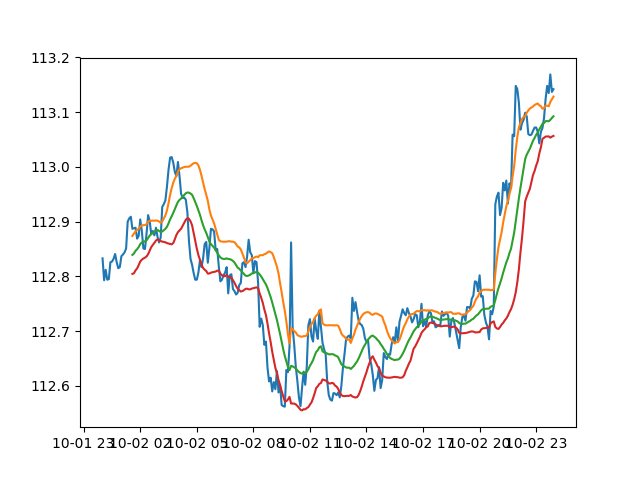

[[<matplotlib.lines.Line2D at 0x7fc575d35f98>],

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
data = hd.data()['Close']
x = data.index
y = data.values
sd = 1
upper, middle, lower = talib.BBANDS(data.values, timeperiod=20, matype=talib.MA_Type.SMA, nbdevup=sd, nbdevdn=sd)
[plt.plot(x, val) for val in [y, upper, middle, lower]]

In [ ]:
data.values

array([ 112.833,  112.793,  112.812,  112.794,  112.795,  112.826,
        112.827,  112.832,  112.841,  112.826,  112.815,  112.817,
        112.837,  112.84 ,  112.844,  112.851,  112.9  ,  112.906,
        112.909,  112.887,  112.888,  112.889,  112.869,  112.874,
        112.904,  112.883,  112.851,  112.85 ,  112.878,  112.912,
        112.901,  112.877,  112.883,  112.875,  112.889,  112.872,
        112.862,  112.871,  112.927,  112.932,  112.939,  112.964,
        112.995,  113.017,  113.018,  113.008,  112.991,  112.983,
        113.009,  112.983,  112.951,  112.943,  112.944,  112.94 ,
        112.917,  112.865,  112.832,  112.821,  112.806,  112.794,
        112.794,  112.807,  112.829,  112.817,  112.833,  112.859,
        112.863,  112.825,  112.852,  112.887,  112.886,  112.882,
        112.848,  112.85 ,  112.818,  112.791,  112.794,  112.802,
        112.807,  112.817,  112.769,  112.802,  112.804,  112.777,
        112.773,  112.767,  112.77 ,  112.784,  112.788,  112.

## References

- [Deep Q-LearningでFXしてみた](http://recruit.gmo.jp/engineer/jisedai/blog/deep-q-learning/)
- [slide](https://www.slideshare.net/JunichiroKatsuta/deep-qlearningfx)